# ME699 Project Pt. 2-- Ethan Feng

### 1. Cell Specs

###### LGM50 
###### Cell Nominal Voltage: 3.63 V
###### Nominal Cell Capacity: 5.0 Ah
###### Max Discharge Rate: 7.275 A
###### Cell Specific Energy: 0.2676 Wh/g
###### Cell Specific Power: 1.18 W/g @80% SOC
###### Voltage Limits of Operation: 2.5 - 4.2 V

###### P45B
###### Cell Nominal Voltage: 3.6 V
###### Nominal Cell Capacity: 4.5 Ah
###### Max Discharge Rate: 13.5 A
###### Cell Specific Energy: 242 Wh/kg
###### Cell Specific Power: 2.62 W/g @90% SOC
###### Voltage Limits of Operation: 2.5 - 4.2 V

### 2. R-K Fits

##### Functions

In [1]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt


def redlich_kister_poly(x, coeffs):
    result = 0.0
    for i in range(0, len(coeffs) - 1):
        result += (coeffs[i]) * (
            (1 - 2 * x) ** (i + 1) - (2 * x * i * (1 - x)) / (1 - 2 * x) ** (1 - i)
        )  # Higher-order terms

    result += (8.3145 * 298.15 / 96485.3321) * np.log(x / (1 - x))
    result += coeffs[-1]

    return result


def loss_function(func, coeffs, x, h):
    predictions = func(x, coeffs)
    return np.sum((predictions - h) ** 2)


def get_coeffs(x_data, y_data, N_max):
    initial_guess_rk = np.ones(N_max) * 0.1
    result_rk = minimize(
        lambda c: loss_function(redlich_kister_poly, c, x_data, y_data),
        initial_guess_rk,
        method="BFGS",
    )
    rk_optimized_coeffs = result_rk.x

    return rk_optimized_coeffs



#### LGM50

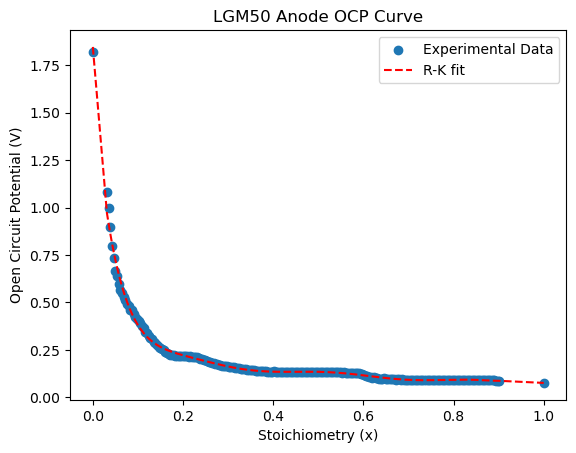

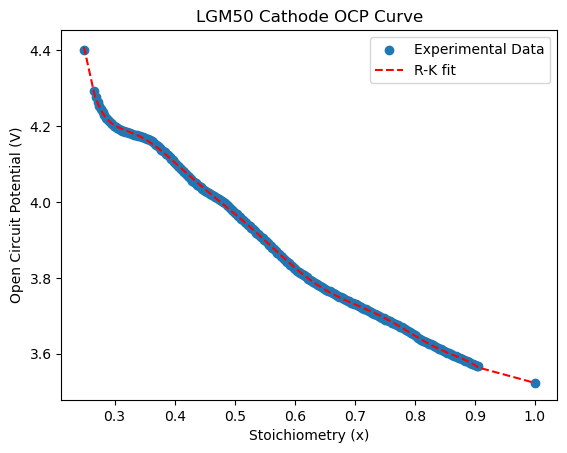

[-0.13451994 -0.15161015 -0.16027467 -0.36175146  0.14457436  0.63714431
 -0.44595161 -1.04608012 -0.02299912  0.20079712  0.0592579  -0.21038388]
[ -6.64535356  -6.18619563  -6.03372075  -6.37885913  -5.24537211
  -3.24156772 -13.14835885 -24.66453109   0.95565813  32.49103059
  19.01226102  -7.06196757]


In [2]:

if __name__ == "__main__":
    # Read in ocp file
    lgm50_anode_ocp_df = pd.read_csv("LG-M50/graphite_LGM50_ocp.csv")
    lgm50_sto_anode, lgm50_ocp_anode = (
        lgm50_anode_ocp_df["sto"].to_numpy(),
        lgm50_anode_ocp_df["ocp"].to_numpy(),
    )

    lgm50_cathode_ocp_df = pd.read_csv("LG-M50/nmc_LGM50_ocp.csv")
    lgm50_sto_cathode, lgm50_ocp_cathode = (
        lgm50_cathode_ocp_df["sto"].to_numpy(),
        lgm50_cathode_ocp_df["ocp"].to_numpy(),
    )

    # Get the coefficients for Nth order RK fit
    lgm50_anode_coeffs = get_coeffs(lgm50_sto_anode, -lgm50_ocp_anode, N_max=12)

    # Plot the data and fit to verify
    plt.scatter(lgm50_sto_anode, lgm50_ocp_anode, label="Experimental Data")
    plt.plot(
        lgm50_sto_anode,
        -redlich_kister_poly(lgm50_sto_anode, lgm50_anode_coeffs),
        color="r",
        linestyle="--",
        label="R-K fit"
    )
    plt.xlabel("Stoichiometry (x)")
    plt.ylabel("Open Circuit Potential (V)")
    plt.title("LGM50 Anode OCP Curve")
    plt.legend()
    plt.show()

    lgm50_cathode_coeffs = get_coeffs(lgm50_sto_cathode, -lgm50_ocp_cathode, N_max=12)
    plt.scatter(lgm50_sto_cathode, lgm50_ocp_cathode, label="Experimental Data")
    plt.plot(
        lgm50_sto_cathode,
        -redlich_kister_poly(lgm50_sto_cathode, lgm50_cathode_coeffs),
        color="r",
        linestyle="--",
        label="R-K fit"
    )
    plt.xlabel("Stoichiometry (x)")
    plt.ylabel("Open Circuit Potential (V)")
    plt.title("LGM50 Cathode OCP Curve")
    plt.legend()
    plt.show()

    print(lgm50_anode_coeffs)
    print(lgm50_cathode_coeffs)


#### P45B

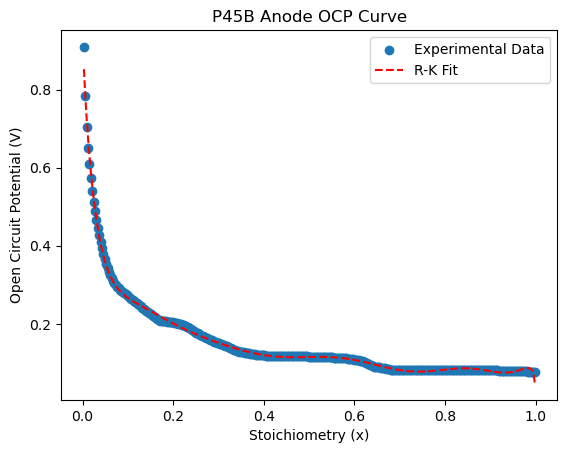

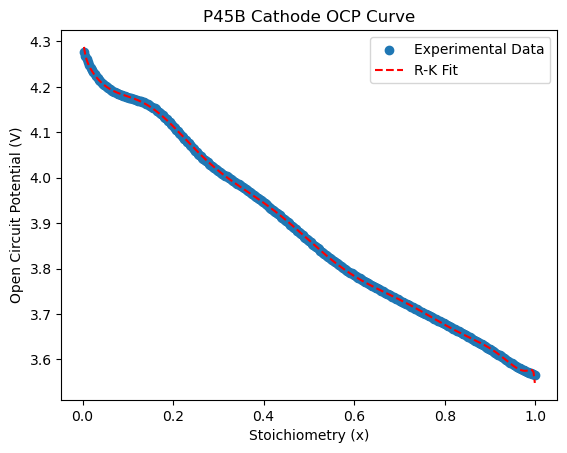

[-0.05603759 -0.07708655 -0.11896403 -0.09649386  0.51492991 -0.09382906
 -1.48642653  0.53330793  1.90199907 -0.60285044 -1.02723306 -0.1533813 ]
[-0.28623998 -0.04243566  0.1091517  -0.01585551 -0.57695251  0.05901815
  1.7448597   0.12388956 -2.12823709 -0.17531718  0.93339131 -3.88355819]


In [3]:

if __name__ == "__main__":
    # Read in ocp file
    p45b_anode_ocp_df = pd.read_csv("P45B/anode_ocp.csv")
    p45b_sto_anode, p45b_ocp_anode = (
        p45b_anode_ocp_df["sto"].to_numpy(),
        p45b_anode_ocp_df["ocp"].to_numpy(),
    )

    p45b_cathode_ocp_df = pd.read_csv("P45B/cathode_ocp.csv")
    p45b_sto_cathode, p45b_ocp_cathode = (
        p45b_cathode_ocp_df["sto"].to_numpy(),
        p45b_cathode_ocp_df["ocp"].to_numpy(),
    )

    # Get the coefficients for Nth order RK fit
    p45b_anode_coeffs = get_coeffs(p45b_sto_anode, -p45b_ocp_anode, N_max=12)

    # Plot the data and fit to verify
    plt.scatter(p45b_sto_anode, p45b_ocp_anode, label="Experimental Data")
    plt.plot(
        p45b_sto_anode,
        -redlich_kister_poly(p45b_sto_anode, p45b_anode_coeffs),
        color="r",
        linestyle="--",
        label="R-K Fit"
    )
    plt.xlabel("Stoichiometry (x)")
    plt.ylabel("Open Circuit Potential (V)")
    plt.title("P45B Anode OCP Curve")
    plt.legend()
    plt.show()

    p45b_cathode_coeffs = get_coeffs(p45b_sto_cathode, -p45b_ocp_cathode, N_max=12)
    plt.scatter(p45b_sto_cathode, p45b_ocp_cathode, label="Experimental Data")
    plt.plot(
        p45b_sto_cathode,
        -redlich_kister_poly(p45b_sto_cathode, p45b_cathode_coeffs),
        color="r",
        linestyle="--",
        label="R-K Fit"
    )
    plt.xlabel("Stoichiometry (x)")
    plt.ylabel("Open Circuit Potential (V)")
    plt.title("P45B Cathode OCP Curve")
    plt.legend()
    plt.show()

    print(p45b_anode_coeffs)
    print(p45b_cathode_coeffs)


### 3. Electrolyte Conductivity, Exchange Current Density, and Diffusivity Plots

#### LGM50

In [4]:
import pybamm
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

R = 8.31446261815324   # J/(mol·K)

def electrolyte_conductivity_Nyman2008(c_e, T):
    sigma_e = (
        0.1297 * (c_e / 1000) ** 3 - 2.51 * (c_e / 1000) ** 1.5 + 3.329 * (c_e / 1000)
    )

    # Nyman et al. (2008) does not provide temperature dependence

    return sigma_e

def graphite_LGM50_electrolyte_exchange_current_density_Chen2020(
    c_e, c_s_surf, c_s_max, T
):
    m_ref = 6.48e-7  # (A/m2)(m3/mol)**1.5 - includes ref concentrations
    E_r = 35000
    arrhenius = np.exp(E_r / R * (1 / 298.15 - 1 / T))

    return m_ref * arrhenius * c_e**0.5 * c_s_surf**0.5 * (c_s_max - c_s_surf) ** 0.5

def nmc_LGM50_electrolyte_exchange_current_density_Chen2020(c_e, c_s_surf, c_s_max, T):
    m_ref = 3.42e-6  # (A/m2)(m3/mol)**1.5 - includes ref concentrations
    E_r = 17800
    arrhenius = np.exp(E_r / R * (1 / 298.15 - 1 / T))

    return m_ref * arrhenius * c_e**0.5 * c_s_surf**0.5 * (c_s_max - c_s_surf) ** 0.5


def electrolyte_diffusivity_Nyman2008(c_e, T):
    D_c_e = 8.794e-11 * (c_e / 1000) ** 2 - 3.972e-10 * (c_e / 1000) + 4.862e-10

    # Nyman et al. (2008) does not provide temperature dependence

    return D_c_e






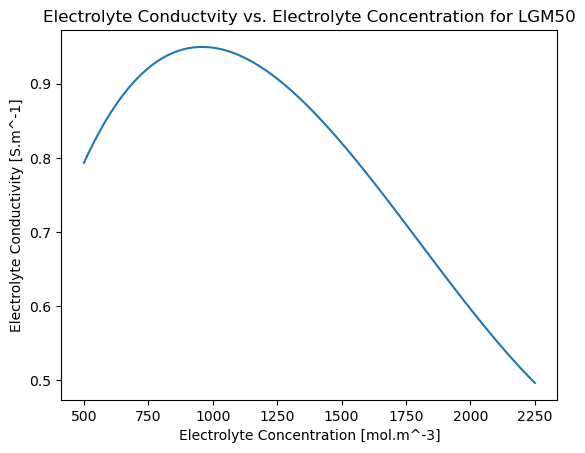

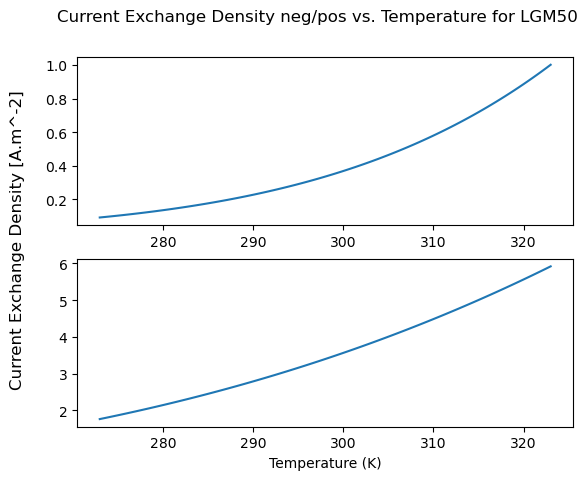

Text(0.5, 1.0, 'Electrolyte Diffusivity vs. Temperature for LGM50')

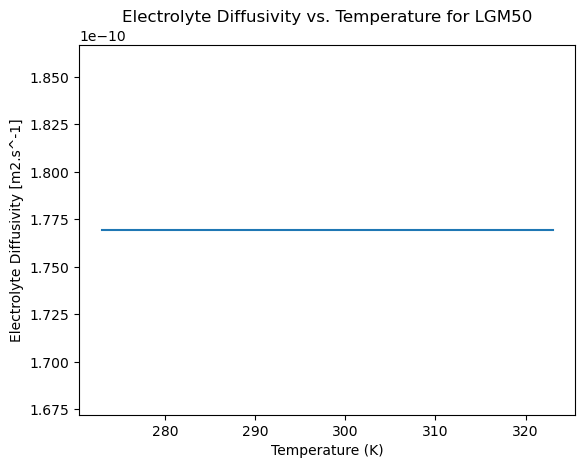

In [5]:


c_e = np.linspace(500, 2250, num=100)
T = 273+25

sigma_e = electrolyte_conductivity_Nyman2008(c_e, T)

plt.plot(c_e, sigma_e)
plt.xlabel("Electrolyte Concentration [mol.m^-3]")
plt.ylabel("Electrolyte Conductivity [S.m^-1]")
plt.title("Electrolyte Conductvity vs. Electrolyte Concentration for LGM50")
plt.show()


T = np.linspace(273, 323, num = 100)
j_n = graphite_LGM50_electrolyte_exchange_current_density_Chen2020(
    c_e=1000, c_s_surf=15000, c_s_max=33133, T=T
)

j_p = nmc_LGM50_electrolyte_exchange_current_density_Chen2020(c_e=1000, c_s_surf=30000, c_s_max=63104, T=T)

D_e = electrolyte_diffusivity_Nyman2008(c_e=1000, T=T) + np.zeros_like(T)

fig, axs = plt.subplots(2, 1)

axs[0].plot(T, j_n)
axs[1].plot(T, j_p)
axs[1].set_xlabel("Temperature (K)")

fig.supylabel("Current Exchange Density [A.m^-2]")

fig.suptitle("Current Exchange Density neg/pos vs. Temperature for LGM50")
plt.show()

plt.plot(T, D_e)
plt.xlabel("Temperature (K)")
plt.ylabel("Electrolyte Diffusivity [m2.s^-1]")
plt.title("Electrolyte Diffusivity vs. Temperature for LGM50")



###### Electrolyte conductivity has an inverse parabolic relationship with concentration
###### Current exchange density (positve and negative) have a positive, exponential relationship with temperature
###### Electrolyte diffusivity doesn't vary with temperature.

#### P45B

In [6]:
import params_p45b as p45b



def electrolyte_conductivity_Valoen2005(c_e, T):
    """
    Conductivity of LiPF6 in EC:DMC as a function of ion concentration, from [1]
    (eqn 17)

    References
    ----------
    .. [1] Valøen, Lars Ole, and Jan N. Reimers. "Transport properties of LiPF6-based
    Li-ion battery electrolytes." Journal of The Electrochemical Society 152.5 (2005):
    A882-A891.

    Parameters
    ----------
    c_e : :class:`pybamm.Symbol`
        Dimensional electrolyte concentration [mol.m-3]
    T : :class:`pybamm.Symbol`
        Dimensional temperature [K]

    Returns
    -------
    :class:`pybamm.Symbol`
        Dimensional electrolyte conductivity [S.m-1]
    """
    # mol/m3 to molar
    c_e = c_e / 1000
    # mS/cm to S/m
    return (1e-3 / 1e-2) * (
        c_e
        * (
            (-10.5 + 0.0740 * T - 6.96e-5 * T**2)
            + c_e * (0.668 - 0.0178 * T + 2.80e-5 * T**2)
            + c_e**2 * (0.494 - 8.86e-4 * T)
        )
        ** 2
    )


def graphite_electrolyte_exchange_current_density_Kim2011(c_e, c_s_surf, c_s_max, T):
    """
    Exchange-current density for Butler-Volmer reactions between graphite and LiPF6 in
    EC:DMC
    [1].

    References
    ----------
    .. [1] Kim, G. H., Smith, K., Lee, K. J., Santhanagopalan, S., & Pesaran, A.
    (2011). Multi-domain modeling of lithium-ion batteries encompassing
    multi-physics in varied length scales. Journal of The Electrochemical
    Society, 158(8), A955-A969.

    Parameters
    ----------
    c_e : :class:`pybamm.Symbol`
        Electrolyte concentration [mol.m-3]
    c_s_surf : :class:`pybamm.Symbol`
        Particle concentration [mol.m-3]
    c_s_max : :class:`pybamm.Symbol`
        Maximum particle concentration [mol.m-3]
    T : :class:`pybamm.Symbol`
        Temperature [K]

    Returns
    -------
    :class:`pybamm.Symbol`
        Exchange-current density [A.m-2]
    """

    i0_ref = 36  # reference exchange current density at 100% SOC
    sto = 0.36  # stoichiometry at 100% SOC
    c_s_n_ref = sto * c_s_max  # reference electrode concentration
    c_e_ref = 1000
    alpha = 0.5  # charge transfer coefficient

    m_ref = i0_ref / (
        c_e_ref**alpha * (c_s_max - c_s_n_ref) ** alpha * c_s_n_ref**alpha
    )

    E_r = 3e4
    arrhenius = np.exp(E_r / R * (1 / 298.15 - 1 / T))

    return (
        m_ref * arrhenius * c_e**alpha * c_s_surf**alpha * (c_s_max - c_s_surf) ** alpha
    )

def nca_electrolyte_exchange_current_density_Kim2011(c_e, c_s_surf, c_s_max, T):
    """
    Exchange-current density for Butler-Volmer reactions between NCA and LiPF6 in EC:DMC
    [1].

    References
    ----------
    .. [1] Kim, G. H., Smith, K., Lee, K. J., Santhanagopalan, S., & Pesaran, A.
    (2011). Multi-domain modeling of lithium-ion batteries encompassing
    multi-physics in varied length scales. Journal of The Electrochemical
    Society, 158(8), A955-A969.

    Parameters
    ----------
    c_e : :class:`pybamm.Symbol`
        Electrolyte concentration [mol.m-3]
    c_s_surf : :class:`pybamm.Symbol`
        Particle concentration [mol.m-3]
    c_s_max : :class:`pybamm.Symbol`
        Maximum particle concentration [mol.m-3]
    T : :class:`pybamm.Symbol`
        Temperature [K]

    Returns
    -------
    :class:`pybamm.Symbol`
        Exchange-current density [A.m-2]
    """
    i0_ref = 4  # reference exchange current density at 100% SOC
    sto = 0.41  # stoichiometry at 100% SOC
    c_s_ref = sto * c_s_max  # reference electrode concentration
    c_e_ref = 1000
    alpha = 0.5  # charge transfer coefficient

    m_ref = i0_ref / (c_e_ref**alpha * (c_s_max - c_s_ref) ** alpha * c_s_ref**alpha)
    E_r = 3e4
    arrhenius = np.exp(E_r / R * (1 / 298.15 - 1 / T))

    return (
        m_ref * arrhenius * c_e**alpha * c_s_surf**alpha * (c_s_max - c_s_surf) ** alpha
    )


def electrolyte_diffusivity_Valoen2005(c_e, T):
    """
    Diffusivity of LiPF6 in EC:DMC as a function of ion concentration, from [1] (eqn 14)

    References
    ----------
    .. [1] Valøen, Lars Ole, and Jan N. Reimers. "Transport properties of LiPF6-based
    Li-ion battery electrolytes." Journal of The Electrochemical Society 152.5 (2005):
    A882-A891.

    Parameters
    ----------
    c_e : :class:`pybamm.Symbol`
        Dimensional electrolyte concentration [mol.m-3]
    T : :class:`pybamm.Symbol`
        Dimensional temperature [K]

    Returns
    -------
    :class:`pybamm.Symbol`
        Dimensional electrolyte diffusivity [m2.s-1]
    """
    # mol/m3 to molar
    c_e = c_e / 1000

    T_g = 229 + 5 * c_e
    D_0 = -4.43 - 54 / (T - T_g)
    D_1 = -0.22

    # cm2/s to m2/s
    # note, in the Valoen paper, ln means log10, so its inverse is 10^x
    return (10 ** (D_0 + D_1 * c_e)) * 1e-4

/home/ethan/EEG (WSL)/ME699 Project/params_p45b.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cathode_j_df = pd.read_csv(


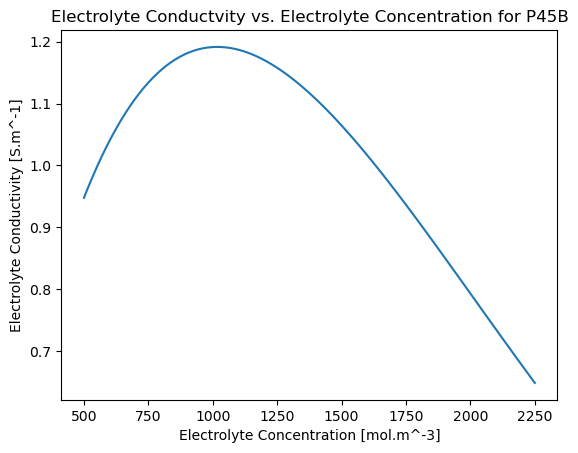

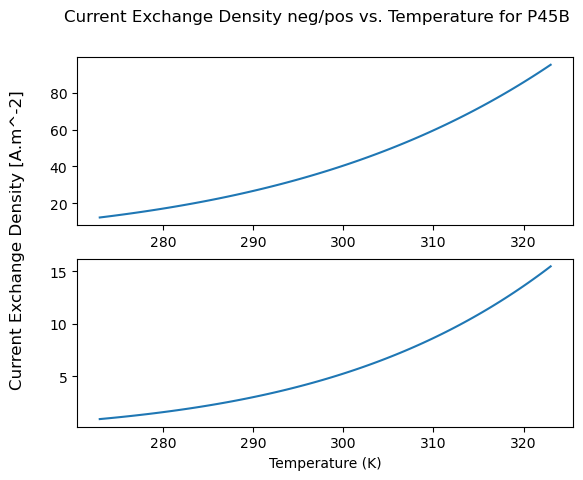

Text(0.5, 1.0, 'Electrolyte Diffusivity vs. Temperature for P45B')

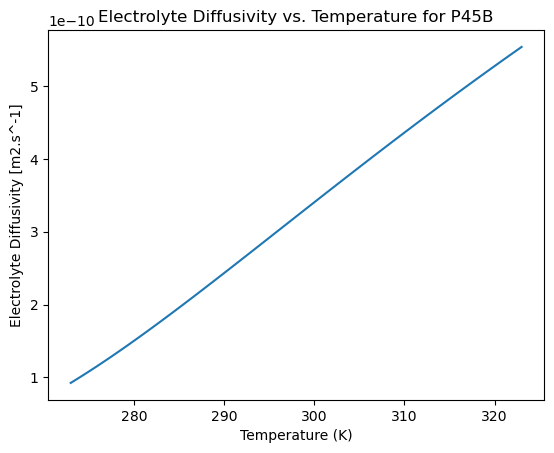

In [7]:

c_e = np.linspace(500, 2250, num=100) #range chosen based off of simplot scale
T = 273+25 #room temp

sigma_e = electrolyte_conductivity_Valoen2005(c_e=c_e, T=T)

plt.plot(c_e, sigma_e)
plt.xlabel("Electrolyte Concentration [mol.m^-3]")
plt.ylabel("Electrolyte Conductivity [S.m^-1]")
plt.title("Electrolyte Conductvity vs. Electrolyte Concentration for P45B")
plt.show()

T = np.linspace(273, 323, num = 100)

j_n = graphite_electrolyte_exchange_current_density_Kim2011(c_e=1000, c_s_surf = 15000, c_s_max=29871.0, T=T) #c_e chosen as1000 bc it is initial value , c_s_max is the max conc from param, c_s_surf is around half of max

j_p = nca_electrolyte_exchange_current_density_Kim2011(c_e, c_s_surf = 22000, c_s_max=46456.0, T=T)

D_e = electrolyte_diffusivity_Valoen2005(c_e=1000, T=T)



fig, axs = plt.subplots(2, 1)

axs[0].plot(T, j_n)
axs[1].plot(T, j_p)
axs[1].set_xlabel("Temperature (K)")

fig.supylabel("Current Exchange Density [A.m^-2]")

fig.suptitle("Current Exchange Density neg/pos vs. Temperature for P45B")
plt.show()

plt.plot(T, D_e)
plt.xlabel("Temperature (K)")
plt.ylabel("Electrolyte Diffusivity [m2.s^-1]")
plt.title("Electrolyte Diffusivity vs. Temperature for P45B")

###### Electrolyte conductivity has an inverse parabolic relationship with concentration
###### Current exchange density (positve and negative) have a positive, exponential relationship with temperature
###### Electrolyte diffusivity varies linearly temperature.

### 4. CC Chg and DChg @1C

#### LGM50

In [8]:
import pybamm
from params_lgm50 import get_parameter_values


model = pybamm.lithium_ion.DFN()
params = get_parameter_values()

params.update({"Negative electrode diffusivity [m2.s-1]": 3.3e-14,
               "Positive electrode diffusivity [m2.s-1]": 4e-15}, check_already_exists=False)

experiment = pybamm.Experiment(
    [
        "Discharge at 1C until 2.5 V",
        "Charge at 1C until 4.2 V",
    ])

solver = pybamm.IDAKLUSolver()
# solver = pybamm.IDAKLUSolver(atol=1e-2, rtol=1e-2)

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=1.0)

# sim.plot() Plotting variables only for part 3

# Below is plotting with matplotlib ---------------------------------------------------------------

# voltage = sol["Voltage [V]"].entries
# current = sol["Current [A]"].entries
# time = sol["Time [s]"].entries

# fig1 = plt.subplot(2, 1, 1)
# plt.scatter(time, voltage, color="b", linestyle="-")
# plt.ylabel("Voltage [V]")

# plt.subplot(2, 1, 2)
# plt.scatter(time, current, color="b", linestyle="-")
# plt.ylabel("Currrent [A]")
# plt.xlabel("Time (sec)")
# plt.suptitle("Simulation Results-- Voltage and CUrrent vs. Time-- Ethan Feng")
# plt.show()

# -------------------------------------------------------------------------------------------------

output_variables = ["Voltage [V]", "Current [A]"]
sim.plot(output_variables)

# sim.plot() Plotting variables only for part 3
#sim.plot(["Electrolyte concentration [mol.m-3]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.6738559786429306, step=0.01673855978642930…

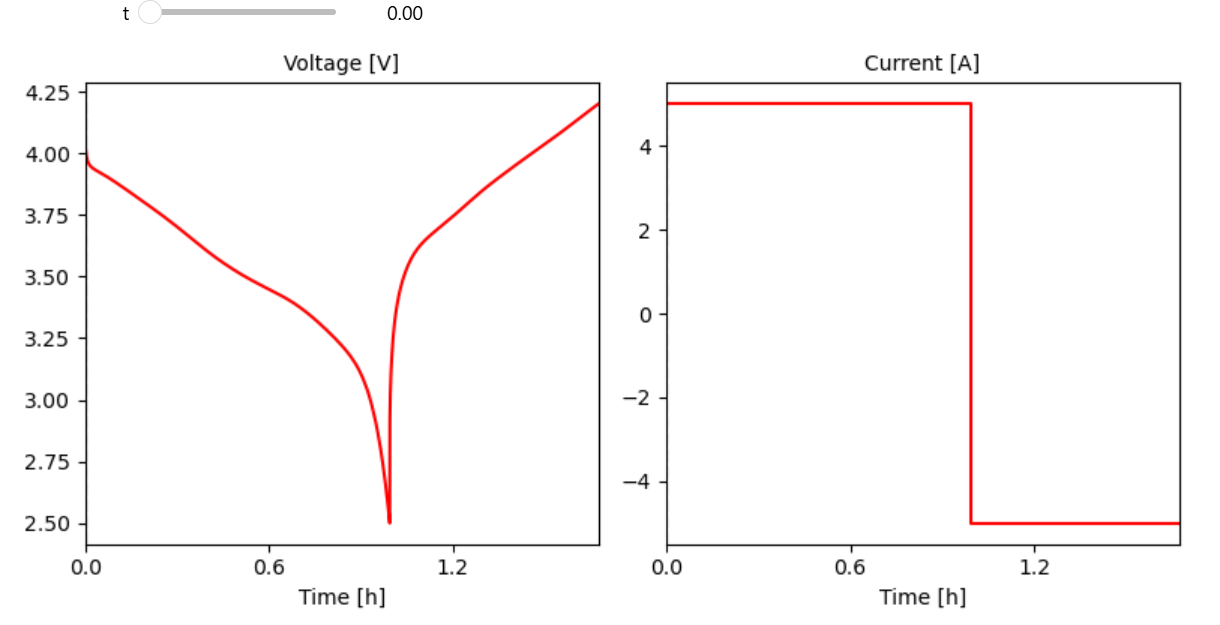

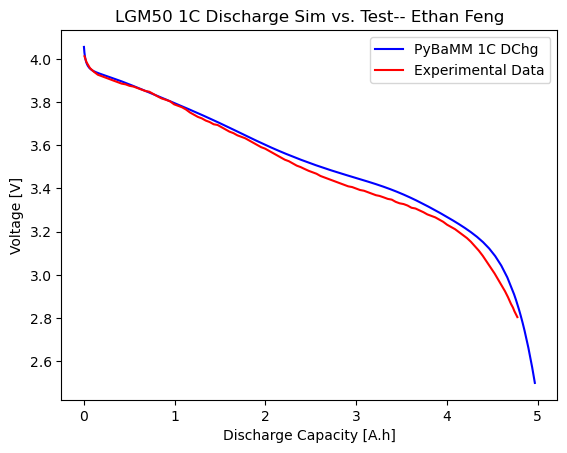

In [9]:
x = [0.00621, 0.02801, 0.06616, 0.10976, 0.15335, 0.19695, 0.24055, 0.28415, 0.32707, 0.37134, 0.41494, 0.45854, 0.50214, 0.54574, 0.58933, 0.63293, 0.67653, 0.72013, 0.76373, 0.80733, 0.85403, 0.90542, 0.94902, 0.99262, 1.03622, 1.07981, 1.12341, 1.16701, 1.21061, 1.25421, 1.2978, 1.3414, 1.385, 1.4286, 1.4722, 1.51579, 1.55939, 1.60299, 1.64659, 1.69019, 1.73378, 1.77738, 1.82098, 1.86458, 1.90818, 1.95177, 1.99537, 2.03897, 2.08257, 2.12617, 2.16959, 2.21336, 2.25696, 2.30056, 2.34416, 2.38776, 2.42762, 2.47495, 2.51847, 2.56215, 2.60575, 2.64934, 2.69294, 2.73654, 2.78014, 2.82374, 2.86733, 2.91093, 2.95453, 2.99813, 3.04179, 3.08533, 3.12892, 3.17252, 3.21612, 3.25621, 3.30332, 3.34706, 3.39051, 3.43411, 3.47771, 3.52131, 3.5649, 3.6085, 3.6521, 3.69231, 3.7393, 3.78289, 3.82649, 3.87009, 3.91369, 3.95729, 4.00088, 4.04448, 4.08808, 4.13168, 4.17528, 4.21888, 4.26247, 4.30607, 4.34967, 4.39327, 4.43687, 4.48046, 4.52406, 4.56221, 4.60036, 4.63851, 4.67121, 4.7039, 4.7257, 4.74205, 4.77475]
y = [4.01189, 3.98453, 3.95717, 3.94007, 3.92638, 3.91954, 3.9127, 3.90586, 3.89902, 3.89218, 3.88534, 3.88192, 3.87508, 3.87166, 3.86482, 3.85798, 3.85114, 3.84772, 3.83746, 3.8272, 3.81694, 3.8101, 3.80326, 3.78958, 3.78274, 3.7759, 3.76564, 3.75195, 3.74169, 3.73143, 3.72459, 3.71433, 3.70749, 3.69723, 3.69381, 3.68355, 3.67329, 3.66303, 3.65619, 3.64593, 3.63909, 3.63225, 3.62199, 3.61173, 3.60147, 3.59121, 3.58436, 3.5741, 3.56384, 3.55358, 3.54332, 3.53306, 3.52622, 3.51596, 3.5057, 3.49886, 3.49088, 3.48176, 3.47492, 3.46808, 3.45782, 3.45098, 3.44414, 3.4373, 3.43046, 3.42362, 3.41678, 3.40993, 3.40651, 3.39967, 3.39283, 3.38941, 3.38257, 3.37573, 3.36889, 3.36547, 3.35863, 3.35179, 3.34837, 3.33811, 3.33127, 3.32785, 3.32101, 3.31075, 3.30733, 3.29935, 3.29023, 3.27997, 3.27313, 3.26629, 3.25603, 3.24577, 3.23208, 3.22182, 3.21156, 3.19788, 3.1842, 3.17052, 3.15342, 3.1329, 3.11238, 3.08844, 3.06108, 3.03371, 3.00635, 2.97899, 2.95163, 2.92427, 2.89691, 2.86612, 2.84902, 2.83192, 2.80456]

experiment = pybamm.Experiment(
    [
        "Discharge at 1C until 2.5 V"
    ])

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=1.0)


voltage = sol["Voltage [V]"].entries
time = sol["Discharge capacity [A.h]"].entries

plt.plot(time, voltage, color="b", label="PyBaMM 1C DChg")
plt.plot(x, y, color="r", label="Experimental Data")
plt.xlabel("Discharge Capacity [A.h]")
plt.ylabel("Voltage [V]")
plt.title("LGM50 1C Discharge Sim vs. Test-- Ethan Feng")
plt.legend()

#### P45B

In [10]:
import pybamm
from params_p45b import get_parameter_values


model = pybamm.lithium_ion.DFN()
params = get_parameter_values()

params.update({"Negative electrode diffusivity [m2.s-1]": 1.5e-13,
               "Positive electrode diffusivity [m2.s-1]": 1.6e-13}, check_already_exists=False)

experiment = pybamm.Experiment(
    [
        "Discharge at 1C until 2.5 V",
        "Charge at 1C until 4.2 V",
    ])

solver = pybamm.IDAKLUSolver()
# solver = pybamm.IDAKLUSolver(atol=1e-2, rtol=1e-2)

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=1.0)


# voltage = sol["Voltage [V]"].entries
# current = sol["Current [A]"].entries
# time = sol["Time [s]"].entries

# fig1 = plt.subplot(2, 1, 1)
# plt.scatter(time, voltage, color="b", linestyle="-")
# plt.ylabel("Voltage [V]")

# plt.subplot(2, 1, 2)
# plt.scatter(time, current, color="b", linestyle="-")
# plt.ylabel("Currrent [A]")
# plt.xlabel("Time (sec)")
# plt.suptitle("Simulation Results-- Voltage and CUrrent vs. Time-- Ethan Feng")
# plt.show()

output_variables = ["Voltage [V]", "Current [A]"]

sim.plot(output_variables)

# sim.plot(["Electrolyte concentration [mol.m-3]"]) ## for p3\
# sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.9853528488743835, step=0.01985352848874383…

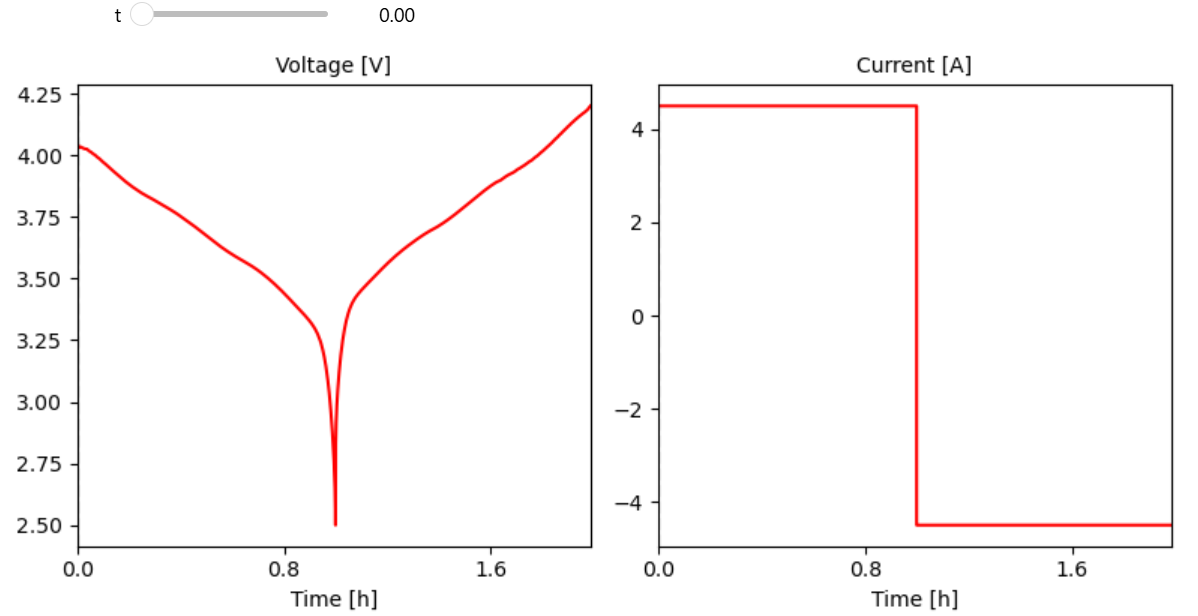

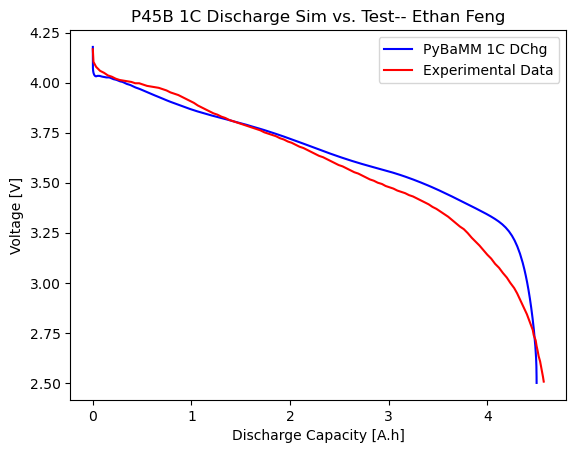

In [11]:
myList = [10,20,30,40,50,60,70,80,90]
myInt = 10
newList = [x / myInt for x in myList]

x = [0, 6.60944, 33.67652, 73.32206, 112.9676, 152.61314, 192.25868, 231.90423, 271.54977, 311.19531, 350.84085, 390.4864, 430.13194, 469.77748, 509.42302, 549.06856, 588.71411, 628.35965, 668.00519, 707.65073, 747.29627, 786.94182, 826.58736, 866.2329, 905.87844, 945.52398, 985.16953, 1024.81507, 1064.46061, 1104.10615, 1143.75169, 1183.39724, 1223.04278, 1262.68832, 1302.33386, 1341.9794, 1381.62495, 1421.27049, 1460.91603, 1500.56157, 1540.20711, 1579.85266, 1619.4982, 1659.14374, 1698.78928, 1738.43482, 1778.08037, 1817.72591, 1857.37145, 1897.01699, 1936.66253, 1976.30808, 2015.95362, 2055.59916, 2095.2447, 2134.89024, 2174.53579, 2214.18133, 2253.82687, 2293.47241, 2333.11796, 2372.7635, 2412.40904, 2452.05458, 2491.70012, 2531.34567, 2570.99121, 2610.63675, 2650.28229, 2689.92783, 2729.57338, 2769.21892, 2808.86446, 2848.51, 2888.15554, 2931.26247, 2967.44663, 3007.09217, 3046.73771, 3086.38325, 3126.0288, 3165.67434, 3205.31988, 3244.96542, 3284.61096, 3324.25651, 3363.90205, 3403.54759, 3443.19313, 3482.83867, 3522.48422, 3562.12976, 3601.7753, 3641.42084, 3681.06638, 3720.71193, 3760.35747, 3800.00301, 3839.64855, 3879.29409, 3918.93964, 3958.58518, 3998.23072, 4037.87626, 4077.52181, 4117.16735, 4156.81289, 4196.45843, 4231.14828, 4270.79382, 4300.52798, 4325.30644, 4350.08491, 4374.86337, 4399.64183, 4419.46461, 4439.28738, 4459.11015, 4469.02153, 4488.8443, 4497.68711, 4508.66707, 4518.57846, 4533.44554, 4543.35692, 4553.26831, 4563.1797, 4570.39015]
y = [4.16667, 4.10349, 4.07843, 4.05882, 4.04902, 4.03595, 4.02941, 4.01961, 4.01307, 4.0098, 4.00654, 4.00327, 3.99673, 3.99673, 3.9902, 3.98366, 3.98039, 3.97712, 3.97386, 3.96732, 3.96078, 3.95098, 3.94444, 3.93791, 3.9281, 3.9183, 3.9085, 3.89869, 3.88562, 3.87582, 3.86601, 3.85621, 3.84641, 3.83987, 3.83007, 3.82353, 3.81373, 3.80719, 3.80065, 3.79412, 3.78758, 3.78105, 3.77451, 3.76797, 3.76144, 3.75163, 3.7451, 3.73856, 3.73203, 3.72222, 3.71569, 3.70588, 3.69935, 3.68954, 3.67974, 3.6732, 3.6634, 3.65359, 3.64379, 3.63399, 3.62745, 3.61765, 3.60784, 3.59804, 3.58824, 3.5817, 3.5719, 3.56209, 3.55229, 3.54575, 3.53595, 3.52614, 3.51634, 3.5098, 3.5, 3.49346, 3.48366, 3.47712, 3.47059, 3.46078, 3.45425, 3.44771, 3.43791, 3.43137, 3.42157, 3.41176, 3.40196, 3.39216, 3.37908, 3.36928, 3.35621, 3.34314, 3.33007, 3.31373, 3.29739, 3.28105, 3.26797, 3.24837, 3.22549, 3.20588, 3.18627, 3.1634, 3.14052, 3.12092, 3.09477, 3.07516, 3.04902, 3.02614, 3, 2.97386, 2.94771, 2.92157, 2.89542, 2.86928, 2.84314, 2.81699, 2.79085, 2.76471, 2.73856, 2.71242, 2.68519, 2.66013, 2.63399, 2.60784, 2.5817, 2.55556, 2.52941, 2.50654]
new_x = [i / 1000 for i in x]
experiment = pybamm.Experiment(
    [
        "Discharge at 1C until 2.5 V"
    ])

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=1.0)


voltage = sol["Voltage [V]"].entries
time = sol["Discharge capacity [A.h]"].entries

plt.plot(time, voltage, color="b", label="PyBaMM 1C DChg")
plt.plot(new_x, y, color="r", label="Experimental Data")
plt.xlabel("Discharge Capacity [A.h]")
plt.ylabel("Voltage [V]")
plt.title("P45B 1C Discharge Sim vs. Test-- Ethan Feng")
plt.legend()

###### For both LGM50 and P45B, the PyBaMM sims generally match the experimental data. However, the experimental data tends to lie lower in voltage than the sim results. 

### 5. Parameter Sweep for Bruggeman Constant, Porosity, and Particle Radius

#### LGM50

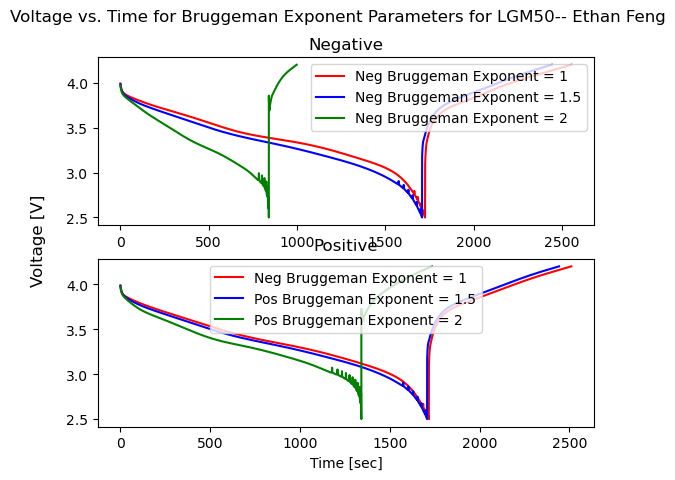

In [12]:
import pybamm
import matplotlib.pyplot as plt
from params_lgm50 import get_parameter_values





model = pybamm.lithium_ion.DFN()
params = get_parameter_values()
params.update({"Negative electrode diffusivity [m2.s-1]": 3.3e-14,
               "Positive electrode diffusivity [m2.s-1]": 4e-15}, check_already_exists=False)

experiment = pybamm.Experiment(
    [
        "Discharge at 2C until 2.5 V",
        "Charge at 2C until 4.2 V"
    ])

solver = pybamm.IDAKLUSolver()

bruggemans = [1, 1.5, 2]
sols_n = []
Vs_n = []
ts_n = []

for bruggeman in bruggemans:
    params = get_parameter_values()
    params.update({"Negative electrode Bruggeman coefficient (electrolyte)": bruggeman}, 
                  check_already_exists=False)
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_n.append(sol)
    Vs_n.append(sol["Voltage [V]"].entries)
    ts_n.append(sol["Time [s]"].entries)


bruggemans = [1, 1.5, 2]
sols_p = []
Vs_p = []
ts_p = []

for bruggeman in bruggemans:
    params = get_parameter_values()
    params.update({"Positive electrode Bruggeman coefficient (electrolyte)": bruggeman}, 
                  check_already_exists=False)
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_p.append(sol)
    Vs_p.append(sol["Voltage [V]"].entries)
    ts_p.append(sol["Time [s]"].entries)


# Below is plotting with matplotlib ---------------------------------------------------------------


fig, axs = plt.subplots(2, 1)

axs[0].plot(ts_n[0], Vs_n[0], color="r", linestyle="-", label="Neg Bruggeman Exponent = 1")
axs[0].plot(ts_n[1], Vs_n[1], color="b", linestyle="-", label="Neg Bruggeman Exponent = 1.5")
axs[0].plot(ts_n[2], Vs_n[2], color="g", linestyle="-", label="Neg Bruggeman Exponent = 2")
axs[0].set_title("Negative")
axs[0].legend()

axs[1].plot(ts_p[0], Vs_p[0], color="r", linestyle="-", label="Neg Bruggeman Exponent = 1")
axs[1].plot(ts_p[1], Vs_p[1], color="b", linestyle="-", label="Pos Bruggeman Exponent = 1.5")
axs[1].plot(ts_p[2], Vs_p[2], color="g", linestyle="-", label="Pos Bruggeman Exponent = 2")
axs[1].set_title("Positive")
axs[1].legend()
axs[1].set_xlabel("Time [sec]")

fig.supylabel("Voltage [V]")

fig.suptitle("Voltage vs. Time for Bruggeman Exponent Parameters for LGM50-- Ethan Feng")
plt.show()





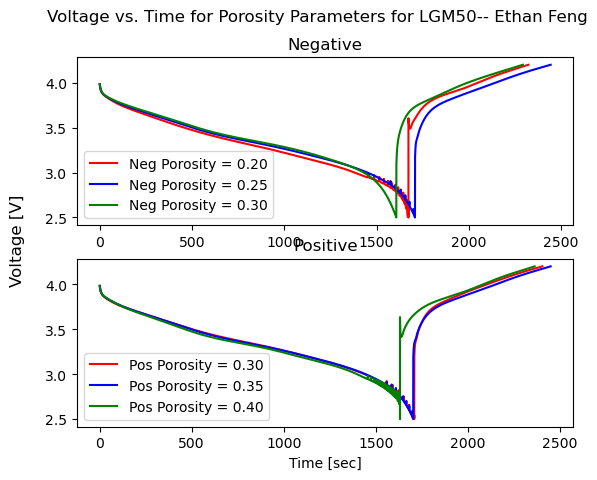

In [13]:
epsilons = [0.2, 0.25, 0.30]
sols_n = []
Vs_n = []
ts_n = []

for epsilon in epsilons:
    params = get_parameter_values()
    params.update({"Negative electrode porosity": epsilon,
                   "Negative electrode active material volume fraction": 1 - epsilon}, 
                  check_already_exists=False)
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_n.append(sol)
    Vs_n.append(sol["Voltage [V]"].entries)
    ts_n.append(sol["Time [s]"].entries)


epsilons = [0.3, 0.35, 0.4]
sols_p = []
Vs_p = []
ts_p = []

for epsilon in epsilons:
    params = get_parameter_values()
    params.update({"Positive electrode porosity": epsilon,
                   "Positive electrode active material volume fraction": 1 - epsilon}, 
                  check_already_exists=False)
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_p.append(sol)
    Vs_p.append(sol["Voltage [V]"].entries)
    ts_p.append(sol["Time [s]"].entries)


# Below is plotting with matplotlib ---------------------------------------------------------------


fig, axs = plt.subplots(2, 1)

axs[0].plot(ts_n[0], Vs_n[0], color="r", linestyle="-", label="Neg Porosity = 0.20")
axs[0].plot(ts_n[1], Vs_n[1], color="b", linestyle="-", label="Neg Porosity = 0.25")
axs[0].plot(ts_n[2], Vs_n[2], color="g", linestyle="-", label="Neg Porosity = 0.30")
axs[0].set_title("Negative")
axs[0].legend()

axs[1].plot(ts_p[0], Vs_p[0], color="r", linestyle="-", label="Pos Porosity = 0.30")
axs[1].plot(ts_p[1], Vs_p[1], color="b", linestyle="-", label="Pos Porosity = 0.35")
axs[1].plot(ts_p[2], Vs_p[2], color="g", linestyle="-", label="Pos Porosity = 0.40")
axs[1].set_title("Positive")
axs[1].legend()
axs[1].set_xlabel("Time [sec]")

fig.supylabel("Voltage [V]")

fig.suptitle("Voltage vs. Time for Porosity Parameters for LGM50-- Ethan Feng")
plt.show()





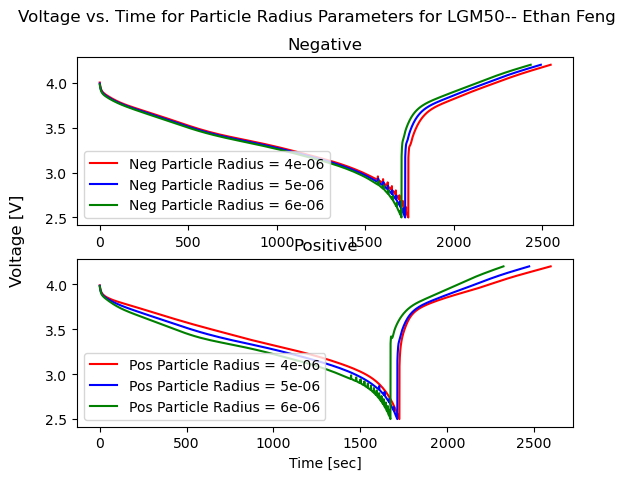

In [14]:
rs = [4e-06, 5e-06, 6e-06]
sols_n = []
Vs_n = []
ts_n = []

for r in rs:
    params = get_parameter_values()
    params.update({"Negative particle radius [m]": r}, 
                  check_already_exists=False)
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_n.append(sol)
    Vs_n.append(sol["Voltage [V]"].entries)
    ts_n.append(sol["Time [s]"].entries)


rs = [4e-06, 5e-06, 6e-06]
sols_p = []
Vs_p = []
ts_p = []

for r in rs:
    params = get_parameter_values()
    params.update({"Positive particle radius [m]": r}, 
                check_already_exists=False)
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_p.append(sol)
    Vs_p.append(sol["Voltage [V]"].entries)
    ts_p.append(sol["Time [s]"].entries)


# Below is plotting with matplotlib ---------------------------------------------------------------


fig, axs = plt.subplots(2, 1)

axs[0].plot(ts_n[0], Vs_n[0], color="r", linestyle="-", label="Neg Particle Radius = 4e-06")
axs[0].plot(ts_n[1], Vs_n[1], color="b", linestyle="-", label="Neg Particle Radius = 5e-06")
axs[0].plot(ts_n[2], Vs_n[2], color="g", linestyle="-", label="Neg Particle Radius = 6e-06")
axs[0].set_title("Negative")
axs[0].legend()

axs[1].plot(ts_p[0], Vs_p[0], color="r", linestyle="-", label="Pos Particle Radius = 4e-06")
axs[1].plot(ts_p[1], Vs_p[1], color="b", linestyle="-", label="Pos Particle Radius = 5e-06")
axs[1].plot(ts_p[2], Vs_p[2], color="g", linestyle="-", label="Pos Particle Radius = 6e-06")
axs[1].set_title("Positive")
axs[1].legend()
axs[1].set_xlabel("Time [sec]")

fig.supylabel("Voltage [V]")

fig.suptitle("Voltage vs. Time for Particle Radius Parameters for LGM50-- Ethan Feng")
plt.show()





#### P45B

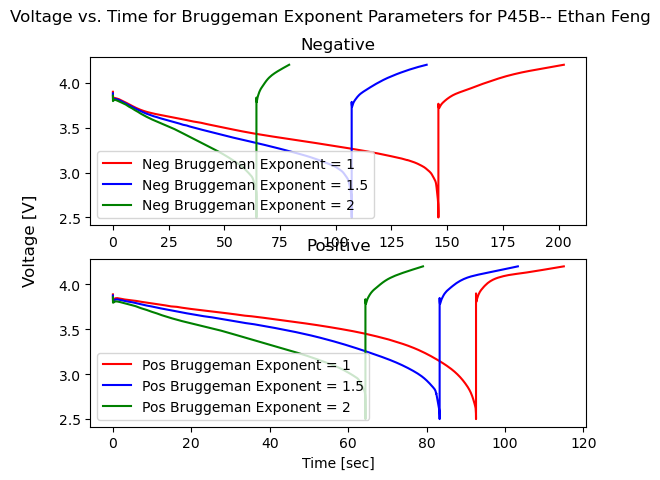

In [15]:
import pybamm
import matplotlib.pyplot as plt
from params_p45b import get_parameter_values





model = pybamm.lithium_ion.DFN()
params = get_parameter_values()

experiment = pybamm.Experiment(
    [
        "Discharge at 10C until 2.5 V",
        "Charge at 10C until 4.2 V"
    ])

solver = pybamm.IDAKLUSolver(atol=1e-3, rtol=1e-3)

bruggemans = [1, 1.5, 2]
sols_n = []
Vs_n = []
ts_n = []

for bruggeman in bruggemans:
    params = get_parameter_values()
    params.update({"Negative electrode Bruggeman coefficient (electrolyte)": bruggeman}, 
                  check_already_exists=False)
    solver = pybamm.IDAKLUSolver(atol=1e-3, rtol=1e-3)
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_n.append(sol)
    Vs_n.append(sol["Voltage [V]"].entries)
    ts_n.append(sol["Time [s]"].entries)


bruggemans = [1, 1.5, 2]
sols_p = []
Vs_p = []
ts_p = []

for bruggeman in bruggemans:
    params = get_parameter_values()
    params.update({"Positive electrode Bruggeman coefficient (electrolyte)": bruggeman}, 
                  check_already_exists=False)
    solver = pybamm.IDAKLUSolver(rtol=1e-3, atol=1e-3)
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_p.append(sol)
    Vs_p.append(sol["Voltage [V]"].entries)
    ts_p.append(sol["Time [s]"].entries)


# Below is plotting with matplotlib ---------------------------------------------------------------


fig, axs = plt.subplots(2, 1)

axs[0].plot(ts_n[0], Vs_n[0], color="r", linestyle="-", label="Neg Bruggeman Exponent = 1")
axs[0].plot(ts_n[1], Vs_n[1], color="b", linestyle="-", label="Neg Bruggeman Exponent = 1.5")
axs[0].plot(ts_n[2], Vs_n[2], color="g", linestyle="-", label="Neg Bruggeman Exponent = 2")
axs[0].set_title("Negative")
axs[0].legend()

axs[1].plot(ts_p[0], Vs_p[0], color="r", linestyle="-", label="Pos Bruggeman Exponent = 1")
axs[1].plot(ts_p[1], Vs_p[1], color="b", linestyle="-", label="Pos Bruggeman Exponent = 1.5")
axs[1].plot(ts_p[2], Vs_p[2], color="g", linestyle="-", label="Pos Bruggeman Exponent = 2")
axs[1].set_title("Positive")
axs[1].legend()
axs[1].set_xlabel("Time [sec]")

fig.supylabel("Voltage [V]")

fig.suptitle("Voltage vs. Time for Bruggeman Exponent Parameters for P45B-- Ethan Feng")
plt.show()





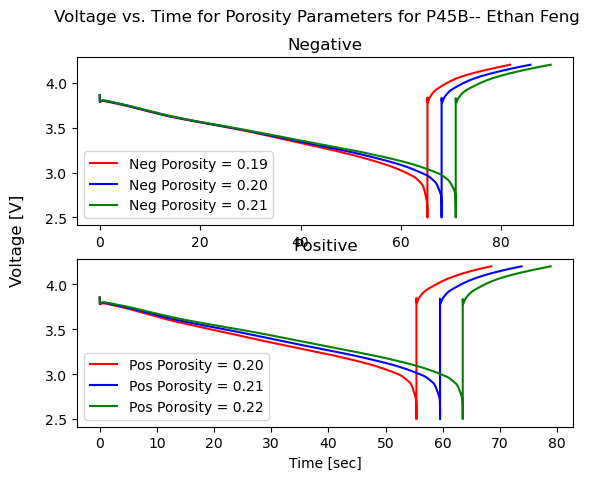

In [16]:
epsilons = [0.19, 0.2, 0.21]
sols_n = []
Vs_n = []
ts_n = []

var_pts = {
    "x_n": 30,  # negative electrode
    "x_s": 30,  # separator
    "x_p": 30,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 30,  # positive particle
}


for epsilon in epsilons:
    model = pybamm.lithium_ion.DFN()
    params = get_parameter_values()
    params.update({"Negative electrode porosity": epsilon,
                  "Positive electrode active material volume fraction": 1 - epsilon},
                  check_already_exists=False)
    solver = pybamm.IDAKLUSolver()
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver, var_pts=var_pts)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_n.append(sol)
    Vs_n.append(sol["Voltage [V]"].entries)
    ts_n.append(sol["Time [s]"].entries)


epsilons = [0.2, 0.21, 0.22]
sols_p = []
Vs_p = []
ts_p = []

for epsilon in epsilons:
    model = pybamm.lithium_ion.DFN()
    params = get_parameter_values()
    params.update({"Positive electrode porosity": epsilon, 
                   "Positive electrode active material volume fraction": 1 - epsilon},
                  check_already_exists=False)
    solver = pybamm.IDAKLUSolver()
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver, var_pts=var_pts)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_p.append(sol)
    Vs_p.append(sol["Voltage [V]"].entries)
    ts_p.append(sol["Time [s]"].entries)


# Below is plotting with matplotlib ---------------------------------------------------------------


fig, axs = plt.subplots(2, 1)

axs[0].plot(ts_n[0], Vs_n[0], color="r", linestyle="-", label="Neg Porosity = 0.19")
axs[0].plot(ts_n[1], Vs_n[1], color="b", linestyle="-", label="Neg Porosity = 0.20")
axs[0].plot(ts_n[2], Vs_n[2], color="g", linestyle="-", label="Neg Porosity = 0.21")
axs[0].set_title("Negative")
axs[0].legend()

axs[1].plot(ts_p[0], Vs_p[0], color="r", linestyle="-", label="Pos Porosity = 0.20")
axs[1].plot(ts_p[1], Vs_p[1], color="b", linestyle="-", label="Pos Porosity = 0.21")
axs[1].plot(ts_p[2], Vs_p[2], color="g", linestyle="-", label="Pos Porosity = 0.22")
axs[1].set_title("Positive")
axs[1].legend()
axs[1].set_xlabel("Time [sec]")

fig.supylabel("Voltage [V]")

fig.suptitle("Voltage vs. Time for Porosity Parameters for P45B-- Ethan Feng")
plt.show()





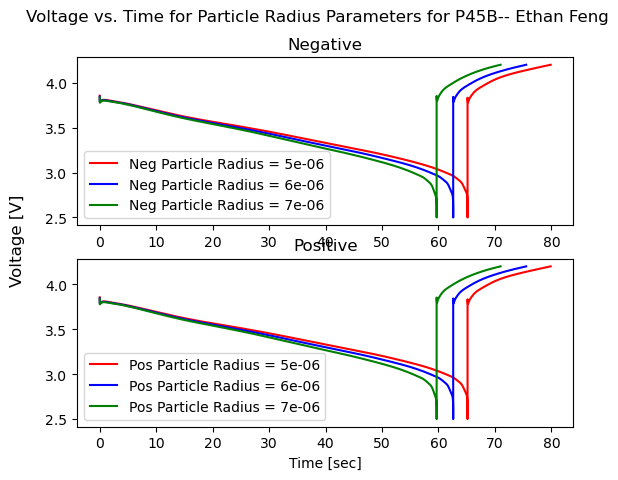

In [17]:
rs = [5e-06, 6e-06, 7e-06]
sols_n = []
Vs_n = []
ts_n = []

for r in rs:
    params = get_parameter_values()
    params.update({"Negative particle radius [m]": r}, 
                  check_already_exists=False)
    solver = pybamm.IDAKLUSolver()
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver, var_pts=var_pts)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_n.append(sol)
    Vs_n.append(sol["Voltage [V]"].entries)
    ts_n.append(sol["Time [s]"].entries)


rs = [5e-06, 6e-06, 7e-06]
sols_p = []
Vs_p = []
ts_p = []

for r in rs:
    params = get_parameter_values()
    params.update({"Negative particle radius [m]": r}, 
                check_already_exists=False)
    solver = pybamm.IDAKLUSolver()
    sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver, var_pts=var_pts)
    sol = sim.solve(initial_soc=1.0)
    V = sol["Voltage [V]"].entries
    sols_p.append(sol)
    Vs_p.append(sol["Voltage [V]"].entries)
    ts_p.append(sol["Time [s]"].entries)


# Below is plotting with matplotlib ---------------------------------------------------------------


fig, axs = plt.subplots(2, 1)

axs[0].plot(ts_n[0], Vs_n[0], color="r", linestyle="-", label="Neg Particle Radius = 5e-06")
axs[0].plot(ts_n[1], Vs_n[1], color="b", linestyle="-", label="Neg Particle Radius = 6e-06")
axs[0].plot(ts_n[2], Vs_n[2], color="g", linestyle="-", label="Neg Particle Radius = 7e-06")
axs[0].set_title("Negative")
axs[0].legend()

axs[1].plot(ts_p[0], Vs_p[0], color="r", linestyle="-", label="Pos Particle Radius = 5e-06")
axs[1].plot(ts_p[1], Vs_p[1], color="b", linestyle="-", label="Pos Particle Radius = 6e-06")
axs[1].plot(ts_p[2], Vs_p[2], color="g", linestyle="-", label="Pos Particle Radius = 7e-06")
axs[1].set_title("Positive")
axs[1].legend()
axs[1].set_xlabel("Time [sec]")

fig.supylabel("Voltage [V]")

fig.suptitle("Voltage vs. Time for Particle Radius Parameters for P45B-- Ethan Feng")
plt.show()





### 6. Power Profiles, Energy and Power Calculations

#### Power Profiles

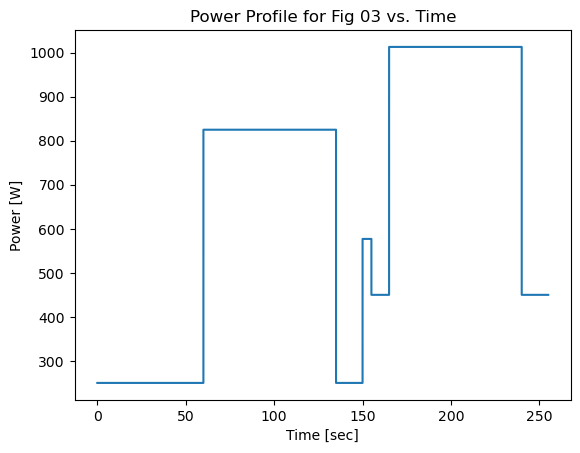

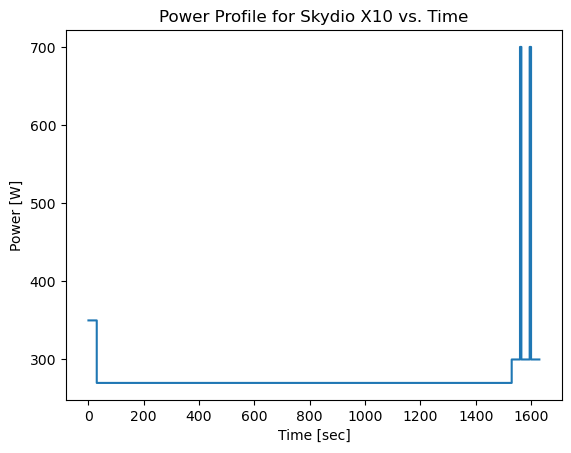

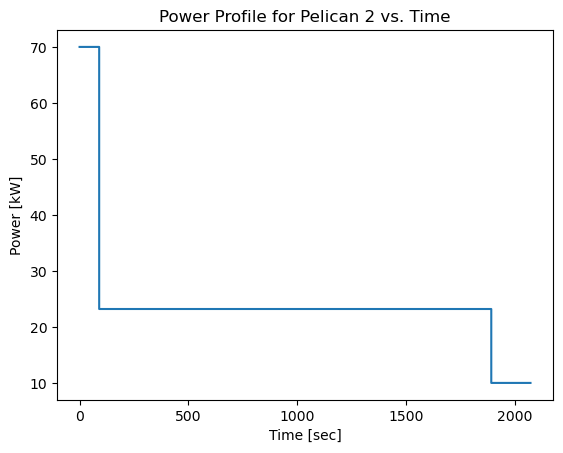

In [18]:
import matplotlib.pyplot as plt
import numpy as np
P_fig = np.array([250, 250, 825,  825, 250,    250, 577,    577, 450,    450, 1013,   1013, 450,    450])
t_fig = np.array([0.01, 60, 60.01, 135, 135.01, 150, 150.01, 155, 155.01, 165, 165.01, 240,  240.01, 255])

#This is repeated for 3.5 hrs = 12600 sec, so 49.41176 times
#or, 49 times and then until 105 seconds more (in the 825 W phase)
#calculated below with Grok



plt.plot(t_fig, P_fig)
plt.xlabel("Time [sec]")
plt.ylabel("Power [W]")
plt.title("Power Profile for Fig 03 vs. Time")
plt.show()





P_sky = np.array([350, 350, 270,   270,  300,     300,  700,     700,  300,     300,  700,     700,   300,     300 ])
t_sky = np.array([0.0, 30,  30.01, 1530, 1530.01, 1560, 1560.01, 1565, 1565.01, 1595, 1595.01, 1600,  1600.01, 1630])

plt.plot(t_sky, P_sky)
plt.xlabel("Time [sec]")
plt.ylabel("Power [W]")
plt.title("Power Profile for Skydio X10 vs. Time")
plt.show()

P_pel = np.array([70,  70,  23.2,  23.2, 10,      10  ])
t_pel = np.array([0.0, 90,  90.01, 1890, 1890.01, 2070])

plt.plot(t_pel, P_pel)
plt.xlabel("Time [sec]")
plt.ylabel("Power [kW]")
plt.title("Power Profile for Pelican 2 vs. Time")
plt.show()


In [19]:
from scipy.integrate import trapezoid

E_fig = 50*trapezoid(y=P_fig, x=t_fig)/3600

print("Figure Required Energy:", E_fig, "Wh")

E_sky = trapezoid(y=P_sky, x=t_sky)/3600

print("Skydio Required Energy:", E_sky, "Wh")

E_pel = trapezoid(y=P_pel, x=t_pel)/3600

print("Pelican Required Energy:", E_pel, "Wh")

P_max_fig = 1013

P_max_sky = 700

P_max_pel = 70000

print("Figure Max Power:", P_max_fig, "W")

print("Skydio Max Power:", P_max_sky, "W")

print("Skydio Max Power:", P_max_pel, "W")

Figure Required Energy: 2371.2708333333335 Wh
Skydio Required Energy: 124.86118055555553 Wh
Pelican Required Energy: 13.850083333333332 Wh
Figure Max Power: 1013 W
Skydio Max Power: 700 W
Skydio Max Power: 70000 W


#### LGM50

##### Figure 

In [20]:
Q_LGM50 = 5.0
V_nom_LGM50 = 3.63

# Energy---------------------------------------------------

npns_fig = E_fig/(Q_LGM50*V_nom_LGM50)
print("Energy Requirement:", npns_fig, "cells")

# Power-----------------------------------------------------

#SOC is basically 0 for peak power at 1013 W

P_max_fig = 1013

#SOC is basically 0 for peak power at 1013 W

P_cell_fig = 20 # Estimated 20W of power delivered at 0.027 SOC doesnt matter anyways

npns_fig = P_max_fig/P_cell_fig
print("Power Requirement:", npns_fig, "cells")

print("Energy Limited:", 131, "cells required")


Energy Requirement: 130.64853076216716 cells
Power Requirement: 50.65 cells
Energy Limited: 131 cells required


##### Skydio

In [21]:
# Energy---------------------------------------------------

npns_sky = E_sky/(Q_LGM50*V_nom_LGM50)
print("Energy Requirement:", npns_sky, "cells")

# Power-----------------------------------------------------

P_max_sky = 700

SOC_P_max = 1 - (trapezoid(y=P_sky[0:10], x=t_sky[0:10])/3600)/E_sky

print("SOC at P_max for sky power profile:", SOC_P_max)


P_cell_sky = 70 # Estimated pure guess

npns_sky = P_max_sky/P_cell_sky
print("Power Requirement:", npns_sky, "cells")

print("Power Limited:", 10, "cells required")

Energy Requirement: 6.879403887358432 cells
SOC at P_max for sky power profile: 0.027808660840566768
Power Requirement: 10.0 cells
Power Limited: 10 cells required


##### Pelican

In [22]:
# Energy---------------------------------------------------

npns_pel = 1000*E_pel/(Q_LGM50*V_nom_LGM50)
print("Energy Requirement:", npns_pel, "cells")

# Power-----------------------------------------------------

P_max_pel = 70000

SOC_P_max = 1

print("SOC at P_max for sky power profile:", SOC_P_max)

P_cell_pel = 90 # Estimated from spec sheet

npns_pel = P_max_pel/P_cell_pel
print("Power Requirement:", npns_pel, "cells")

print("Power Limited:", 994, "cells required (done by trial and error using pybamm)")

Energy Requirement: 763.0899908172636 cells
SOC at P_max for sky power profile: 1
Power Requirement: 777.7777777777778 cells
Power Limited: 994 cells required (done by trial and error using pybamm)


#### P45B

##### Figure

In [23]:
Q_P45B = 4.5
V_nom_P45B = 3.6

# Energy---------------------------------------------------
npns_fig = E_fig/(Q_P45B*V_nom_P45B)
print("Energy Requirement:", npns_fig, "cells")

# Power-----------------------------------------------------

#SOC is basically 0 for peak power at 1013 W

P_max_fig = 1013

#SOC is basically 0 for peak power at 1013 W

P_cell_fig = 100 # gues???????? doesn't matter fig is limited by energy anyways

npns_fig = P_max_fig/P_cell_fig
print("Power Requirement:", npns_fig, "cells")

print("Energy Limited:", 147, "cells required")


Energy Requirement: 146.37474279835394 cells
Power Requirement: 10.13 cells
Energy Limited: 147 cells required


##### Skydio

In [24]:
# Energy---------------------------------------------------

npns_sky = E_sky/(Q_P45B*V_nom_P45B)
print("Energy Requirement:", npns_sky, "cells")

# Power-----------------------------------------------------

P_max_sky = 700

SOC_P_max = 1 - (trapezoid(y=P_sky[0:10], x=t_sky[0:10])/3600)/E_sky

print("SOC at P_max for sky power profile:", SOC_P_max)


P_cell_sky = 87.5 # Estimated pure guess

npns_sky = P_max_sky/P_cell_sky
print("Power Requirement:", npns_sky, "cells")

print("Power Limited:", 8, "cells required")

Energy Requirement: 7.707480281207132 cells
SOC at P_max for sky power profile: 0.027808660840566768
Power Requirement: 8.0 cells
Power Limited: 8 cells required


##### Pelican

In [25]:
# Energy---------------------------------------------------

npns_pel = 1000*E_pel/(Q_P45B*V_nom_P45B)
print("Energy Requirement:", npns_pel, "cells")

# Power-----------------------------------------------------

P_max_pel = 70000

SOC_P_max = 1

print("SOC at P_max for sky power profile:", SOC_P_max)


P_cell_pel = 184

npns_pel = P_max_pel/P_cell_pel
print("Power Requirement:", npns_pel, "cells")

print("Energy Limited:", 855, "cells required")

Energy Requirement: 854.9434156378601 cells
SOC at P_max for sky power profile: 1
Power Requirement: 380.4347826086956 cells
Energy Limited: 855 cells required


### 7. Limiting Factor

###### For Figure, energy is the limiting factor. For Skydio , power is the limiting factor. For Pelican, power is the limiting factor for LGM50, but energy is the limiting factor for P45B

### 8. Mission Simulations in PyBaMM

##### Power Profile

In [26]:
import matplotlib.pyplot as plt
import numpy as np
P_fig = np.array([250, 250, 825,  825, 250,    250, 577,    577, 450,    450, 1013,   1013, 450,    450])
t_fig = np.array([0.0, 60, 60.01, 135, 135.01, 150, 150.01, 155, 155.01, 165, 165.01, 240,  240.01, 255])



#This is repeated for 3.5 hrs = 12600 sec, so 49.41176 times
#or, 49 times and then until 105 seconds more (in the 825 W phase)

#---------



P_sky = np.array([350, 350, 270,   270,  300,     300,  700,     700,  300,     300,  700,     700,   300,     300 ])
t_sky = np.array([0.0, 30,  30.01, 1530, 1530.01, 1560, 1560.01, 1565, 1565.01, 1595, 1595.01, 1600,  1600.01, 1630])

#---------

P_pel = np.array([70,  70,  23.2,  23.2, 10,      10  ])
t_pel = np.array([0.0, 90,  90.01, 1890, 1890.01, 2070])



#### LGM50

##### Figure

In [27]:
import pybamm
from params_lgm50 import get_parameter_values

#131 cells as required by energy 

npns_fig = 131

model = pybamm.lithium_ion.DFN()

params = get_parameter_values()

experiment = pybamm.Experiment(
    [
        f"Discharge at {250/npns_fig} W for 60 seconds",
        f"Discharge at {825/npns_fig} W for 75 seconds",
        f"Discharge at {250/npns_fig} W for 15 seconds",
        f"Discharge at {577/npns_fig} W for 5 seconds",
        f"Discharge at {450/npns_fig} W for 10 seconds",
        f"Discharge at {1013/npns_fig} W for 75 seconds",
        f"Discharge at {450/npns_fig} W for 15 seconds",
    ] *49
     +
    [
        f"Discharge at {250/npns_fig} W for 60 seconds",
        f"Discharge at {825/npns_fig} W for 45 seconds",
    ], termination="2.5 V")



solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=3.5, step=0.035), Output()), _dom_classes=('…

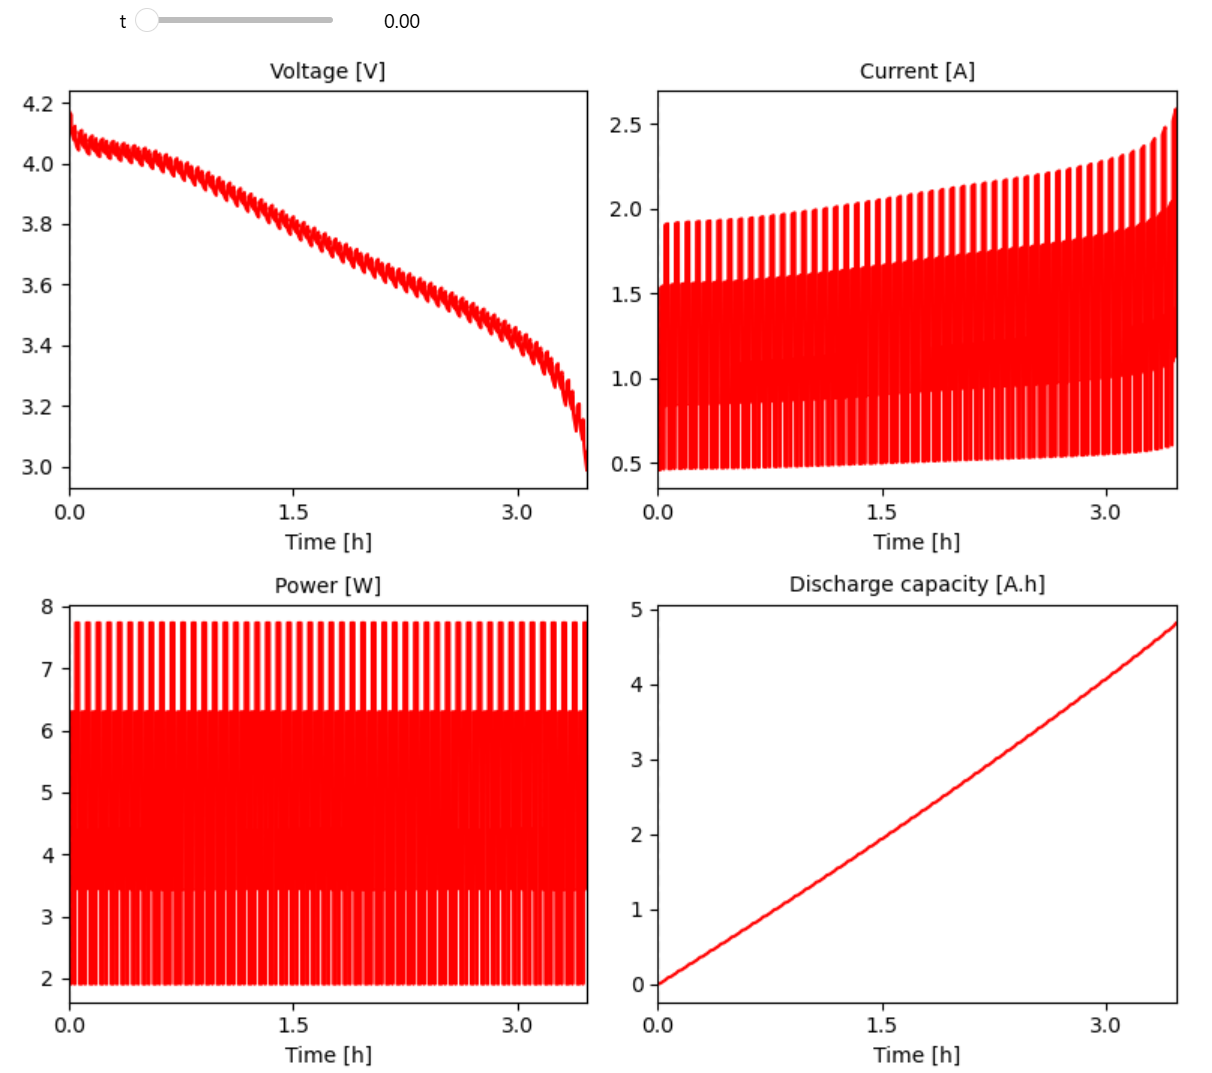

In [28]:
model.variables.search("electrolyte potential")

Results for 'electrolyte potential': ['Electrolyte potential [V]', 'X-averaged electrolyte potential [V]', 'Gradient of electrolyte potential [V.m-1]', 'Negative electrolyte potential [V]', 'X-averaged negative electrolyte potential [V]', 'Gradient of negative electrolyte potential [V.m-1]', 'Separator electrolyte potential [V]', 'X-averaged separator electrolyte potential [V]', 'Gradient of separator electrolyte potential [V.m-1]', 'Positive electrolyte potential [V]', 'X-averaged positive electrolyte potential [V]', 'Gradient of positive electrolyte potential [V.m-1]']


In [ ]:
I = sol["Current [A]"].entries
t = sol["Time [s]"].entries

idx_max_I = np.argmax(I)

t_max_I = float(t[idx_max_I])

print(t_max_I)

output_variables = ["Negative particle surface concentration [mol.m-3]",
             "Positive particle surface concentration [mol.m-3]",
             "Electrolyte concentration [mol.m-3]", 
             "Negative electrode potential [V]",
             "Positive electrode potential [V]",
             "Electrolyte potential [V]"
             ]

sim.plot(output_variables)

12480.0


interactive(children=(FloatSlider(value=0.0, description='t', max=3.5, step=0.035), Output()), _dom_classes=('…

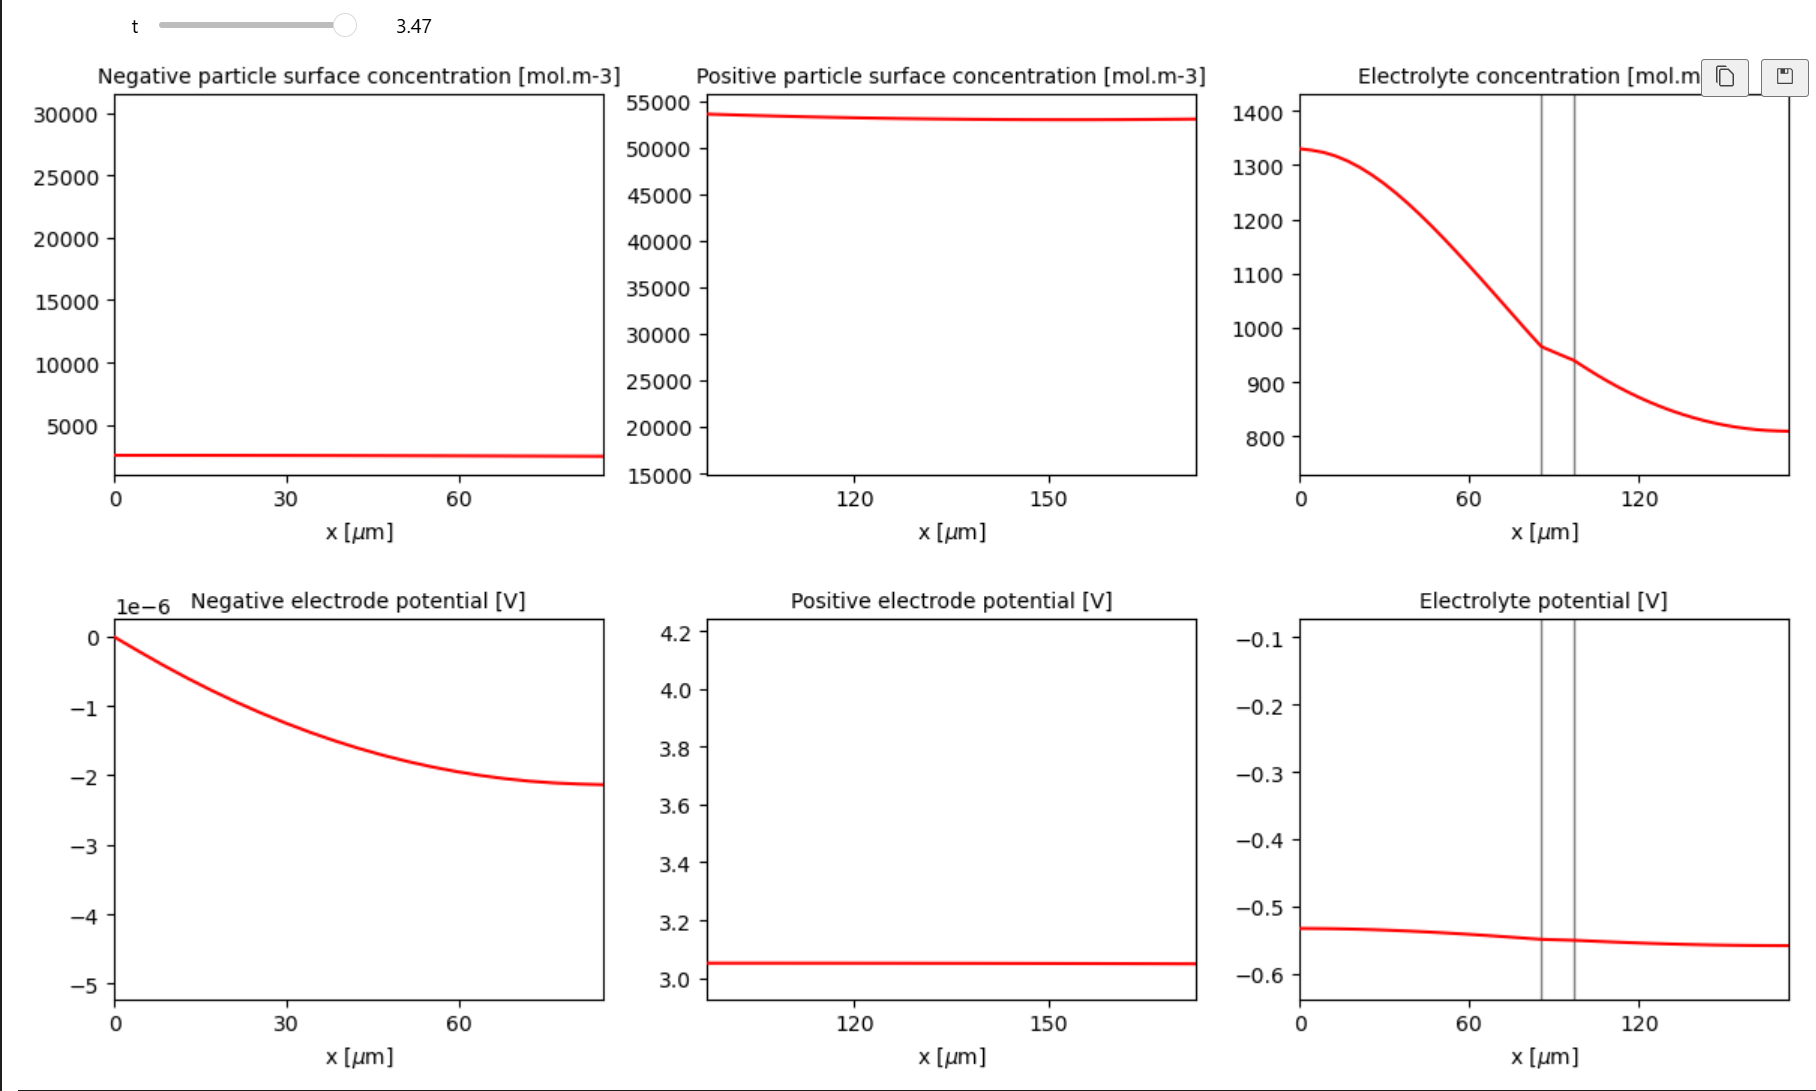

In [30]:
print("Number of cells:", npns_fig)
P_cell_fig = P_max_fig/npns_fig
print("Max Power of Cell (when it's needed at the relevant SOC):", P_cell_fig, "W")
### POWER NOT RELEVANT/VALID FOR FIG

Number of cells: 131
Max Power of Cell (when it's needed at the relevant SOC): 7.732824427480916 W


##### Skydio

In [31]:
npns_sky = 10

power_interpolant = pybamm.Interpolant(t_sky, P_sky/npns_sky, pybamm.t)

model = pybamm.lithium_ion.DFN(options={"operating mode": "power"})

params = get_parameter_values()
params.update({"Power function [W]": power_interpolant}, check_already_exists=False)

solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, solver=solver)
sol = sim.solve(t_eval=[0, t_sky[-1]], initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1630.0, step=16.3), Output()), _dom_classes=…

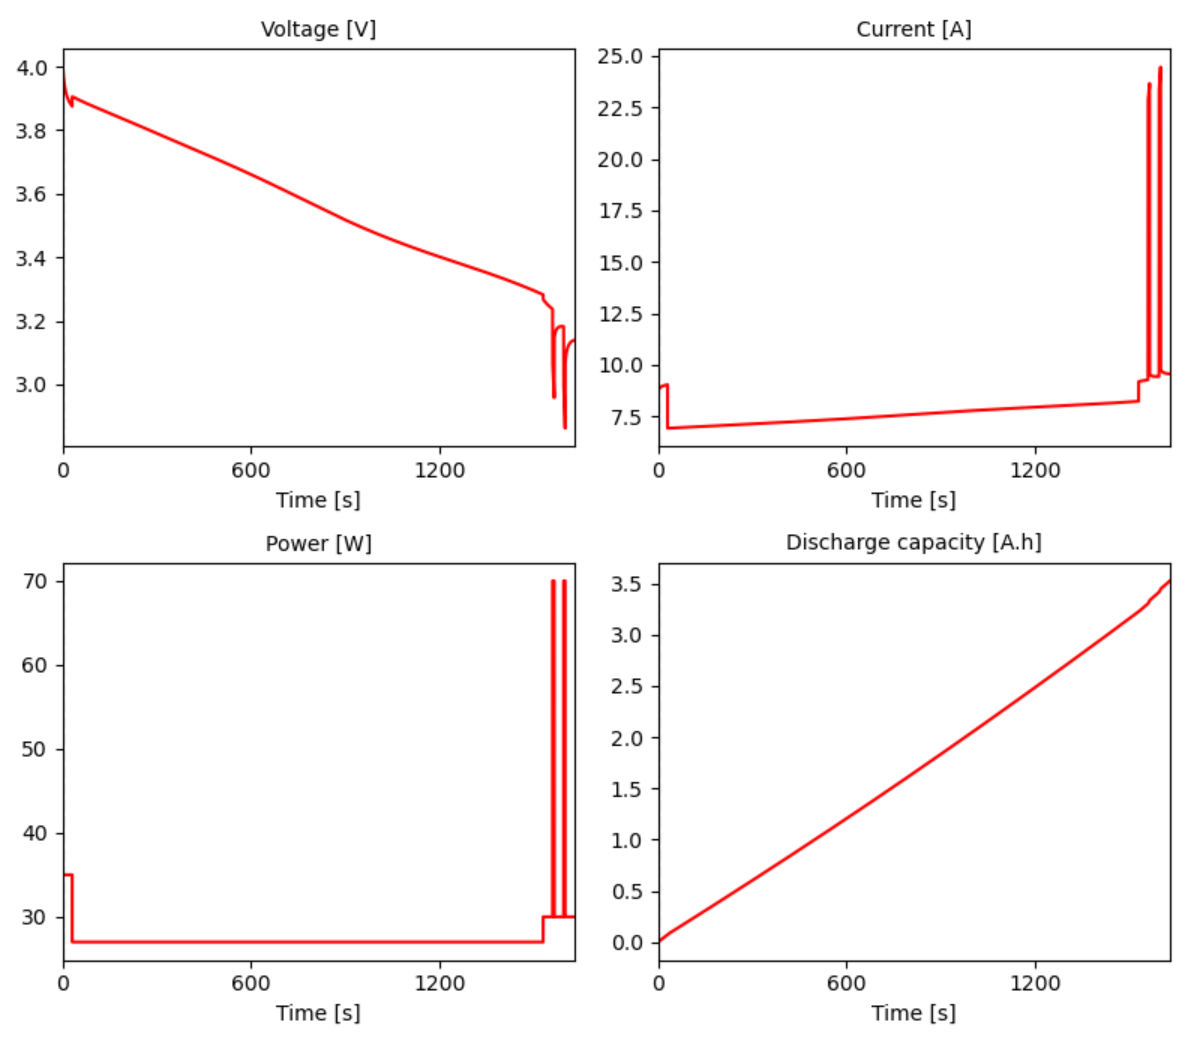

In [32]:
I = sol["Current [A]"].entries
t = sol["Time [s]"].entries

idx_max_I = np.argmax(I)

t_max_I = float(t[idx_max_I])

print(t_max_I)

output_variables = ["Negative particle surface concentration [mol.m-3]",
             "Positive particle surface concentration [mol.m-3]",
             "Electrolyte concentration [mol.m-3]", 
             "Negative electrode potential [V]",
             "Positive electrode potential [V]",
             "Electrolyte potential [V]"
             ]

sim.plot(output_variables)

1599.9999558024524


interactive(children=(FloatSlider(value=0.0, description='t', max=1630.0, step=16.3), Output()), _dom_classes=…

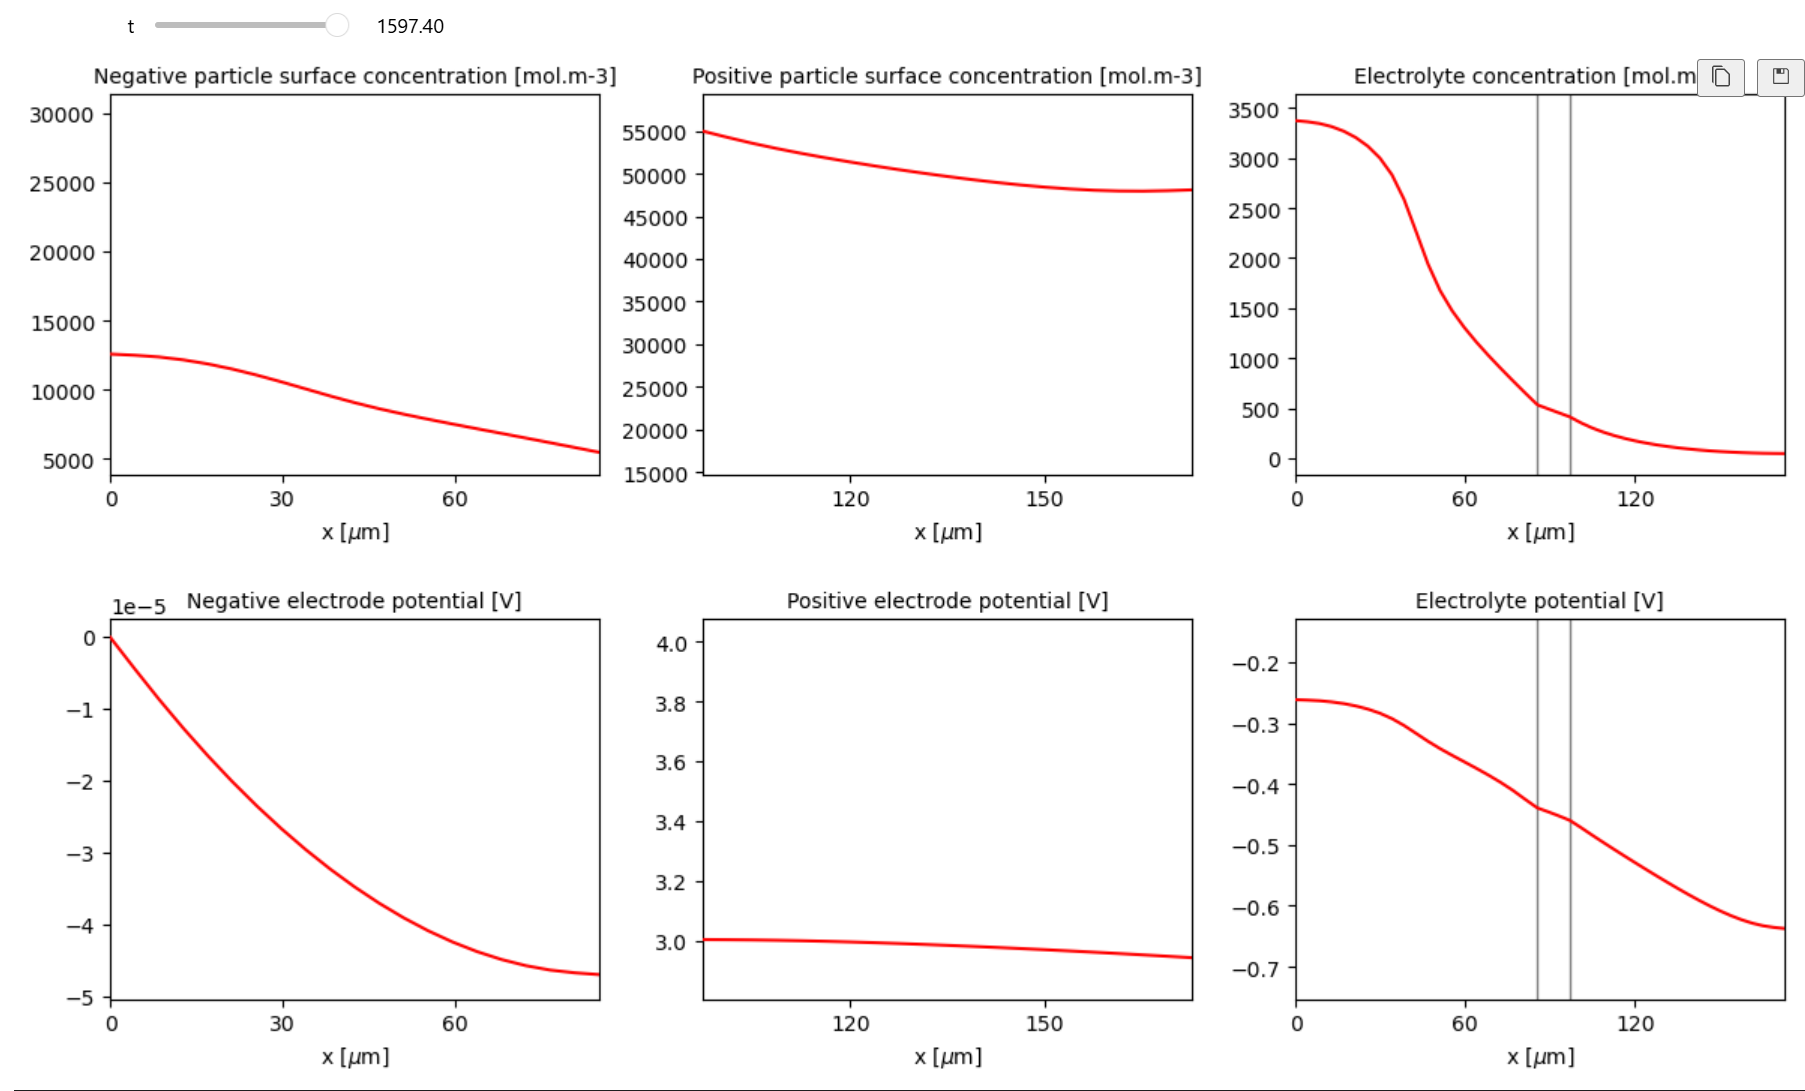

In [33]:
print("Number of cells:", npns_sky)
P_cell_sky = P_max_sky/npns_sky
print("Max Power of Cell (when it's needed at the relevant SOC):", P_cell_sky, "W")

Number of cells: 10
Max Power of Cell (when it's needed at the relevant SOC): 70.0 W


##### Pelican

In [34]:
import pybamm
from params_lgm50 import get_parameter_values

npns_pel = 994

power_interpolant = pybamm.Interpolant(t_pel, 1000*P_pel/npns_pel, pybamm.t)

model = pybamm.lithium_ion.DFN(options={"operating mode": "power"})

params = get_parameter_values()
params.update({"Power function [W]": power_interpolant}, check_already_exists=False)

solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, solver=solver)
sol = sim.solve(t_eval=[0, t_pel[-1]], initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=2070.0, step=20.7), Output()), _dom_classes=…

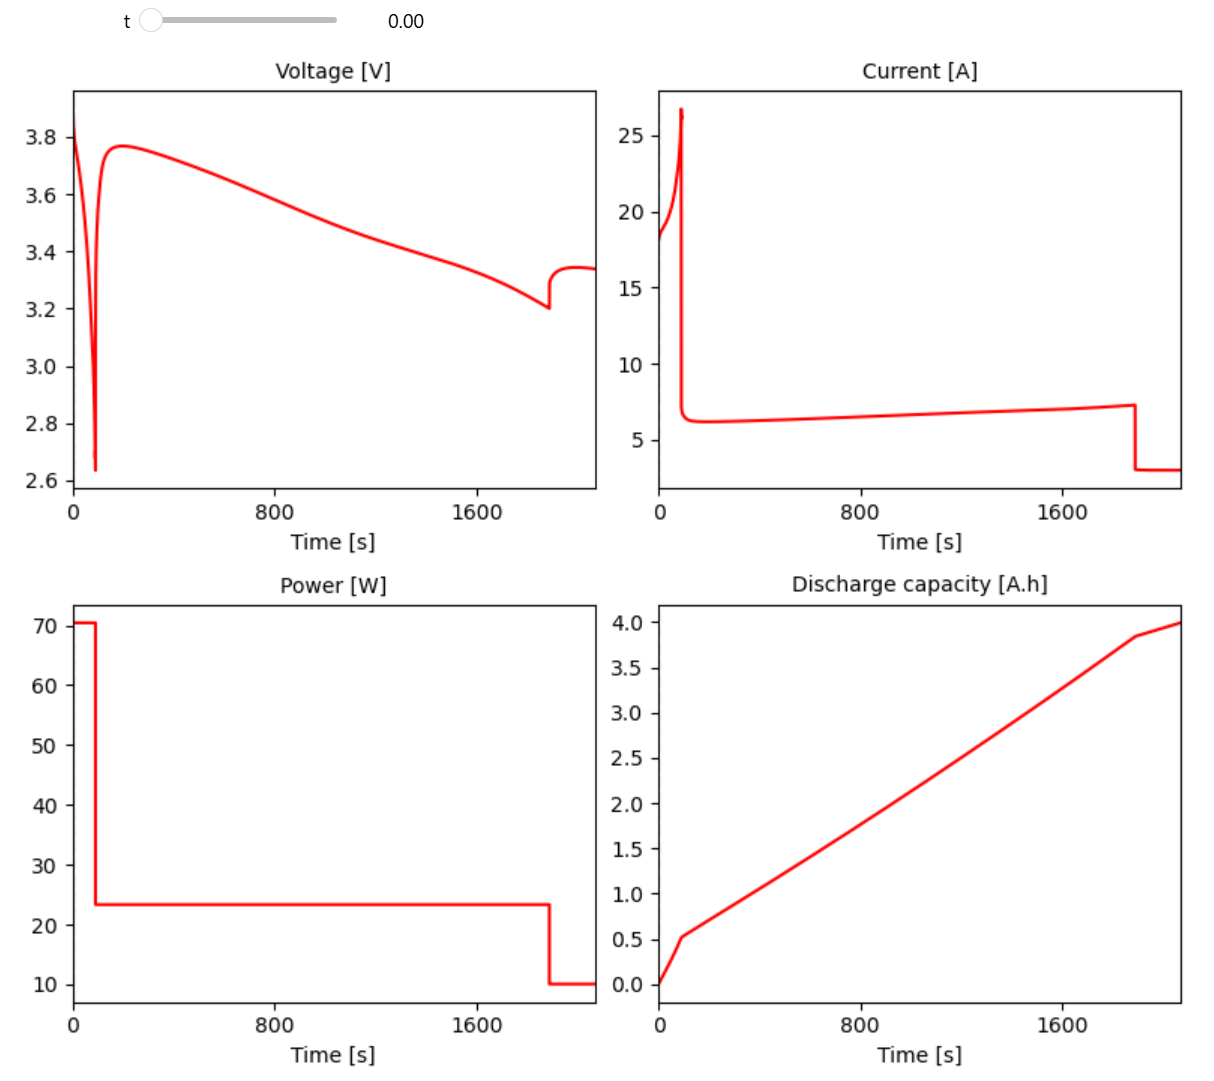

In [35]:
I = sol["Current [A]"].entries
t = sol["Time [s]"].entries

idx_max_I = np.argmax(I)

t_max_I = float(t[idx_max_I])

print(t_max_I)

output_variables = ["Negative particle surface concentration [mol.m-3]",
             "Positive particle surface concentration [mol.m-3]",
             "Electrolyte concentration [mol.m-3]", 
             "Negative electrode potential [V]",
             "Positive electrode potential [V]",
             "Electrolyte potential [V]"
             ]

sim.plot(output_variables)

89.99987424252078


interactive(children=(FloatSlider(value=0.0, description='t', max=2070.0, step=20.7), Output()), _dom_classes=…

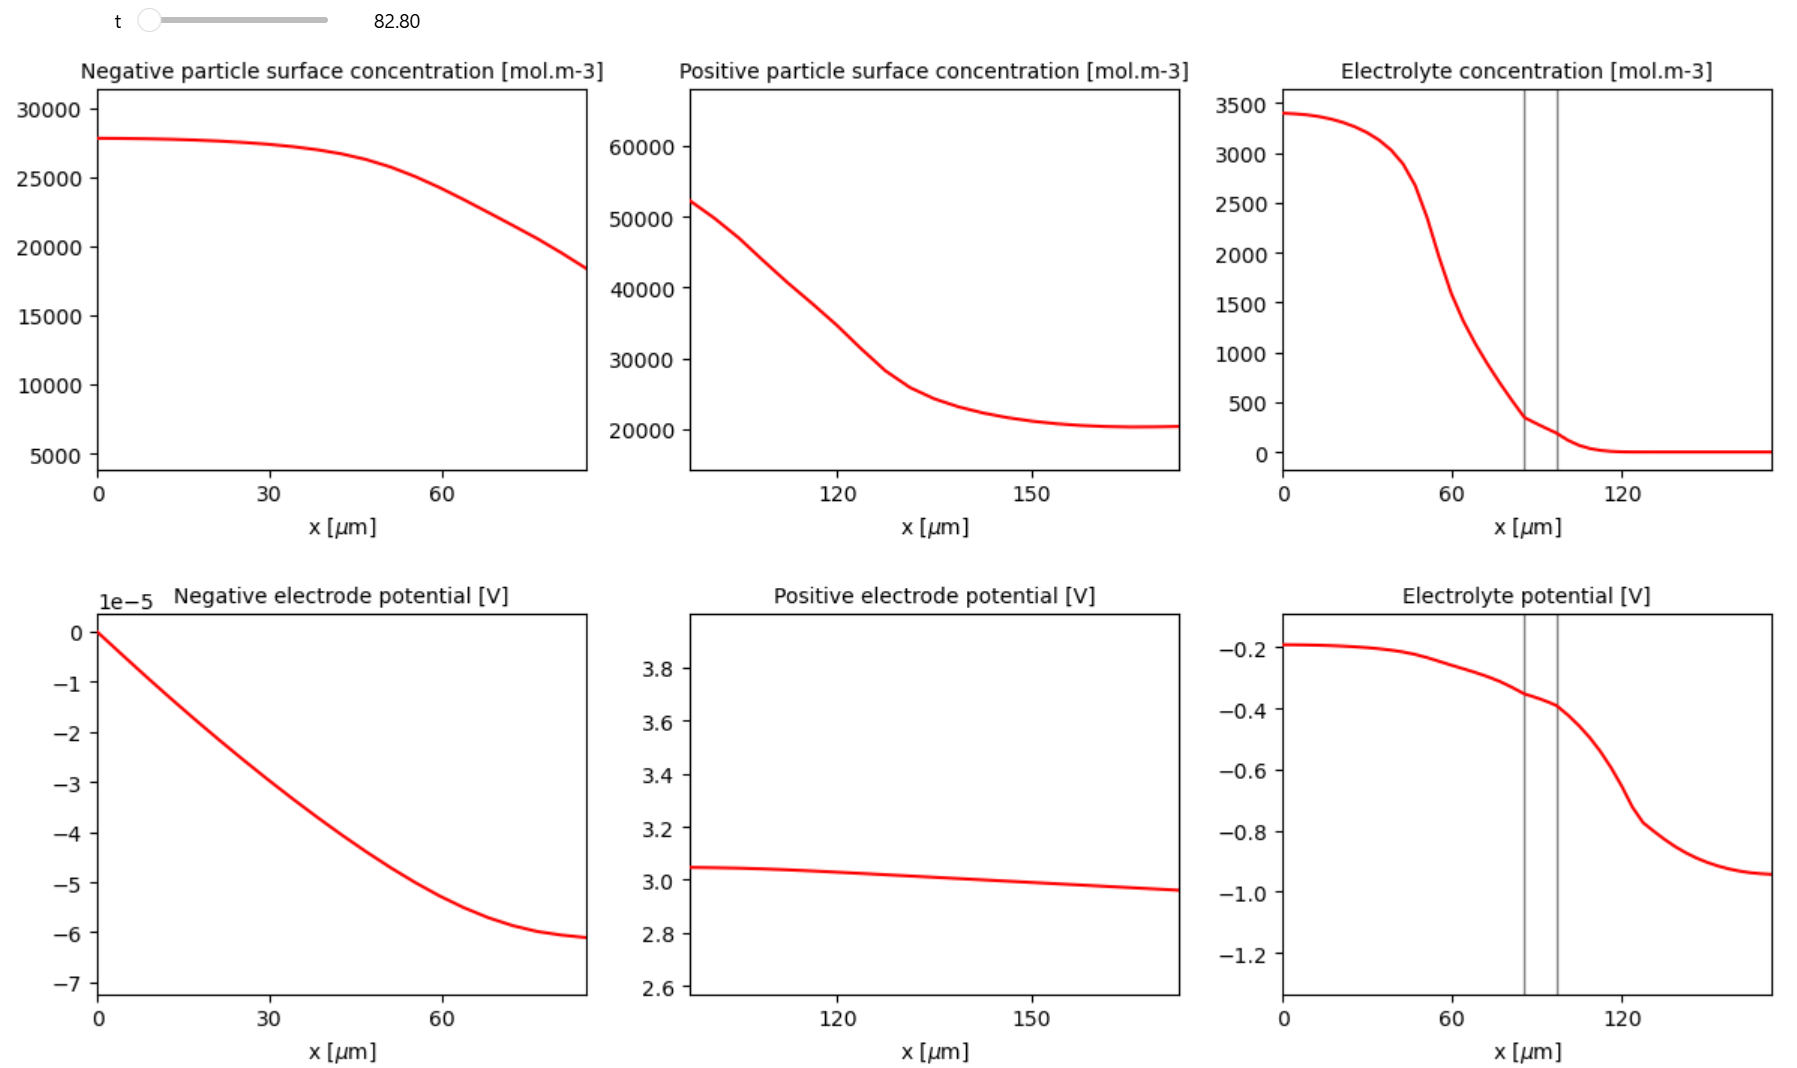

In [36]:
print("Number of cells:", npns_pel)
P_cell_pel = P_max_pel/npns_pel
print("Max Power of Cell (when it's needed at the relevant SOC):", P_cell_pel, "W")

Number of cells: 994
Max Power of Cell (when it's needed at the relevant SOC): 70.4225352112676 W


#### P45B

##### Figure

In [37]:
import pybamm
from params_p45b import get_parameter_values

#131 cells as required by energy 

npns_fig = 148

model = pybamm.lithium_ion.DFN()

params = get_parameter_values()

experiment = pybamm.Experiment(
    [
        f"Discharge at {250/npns_fig} W for 60 seconds",
        f"Discharge at {825/npns_fig} W for 75 seconds",
        f"Discharge at {250/npns_fig} W for 15 seconds",
        f"Discharge at {577/npns_fig} W for 5 seconds",
        f"Discharge at {450/npns_fig} W for 10 seconds",
        f"Discharge at {1013/npns_fig} W for 75 seconds",
        f"Discharge at {450/npns_fig} W for 15 seconds",
    ] *49
     +
    [
        f"Discharge at {250/npns_fig} W for 60 seconds",
        f"Discharge at {825/npns_fig} W for 45 seconds",
    ], termination="2.5 V")


solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=3.5, step=0.035), Output()), _dom_classes=('…

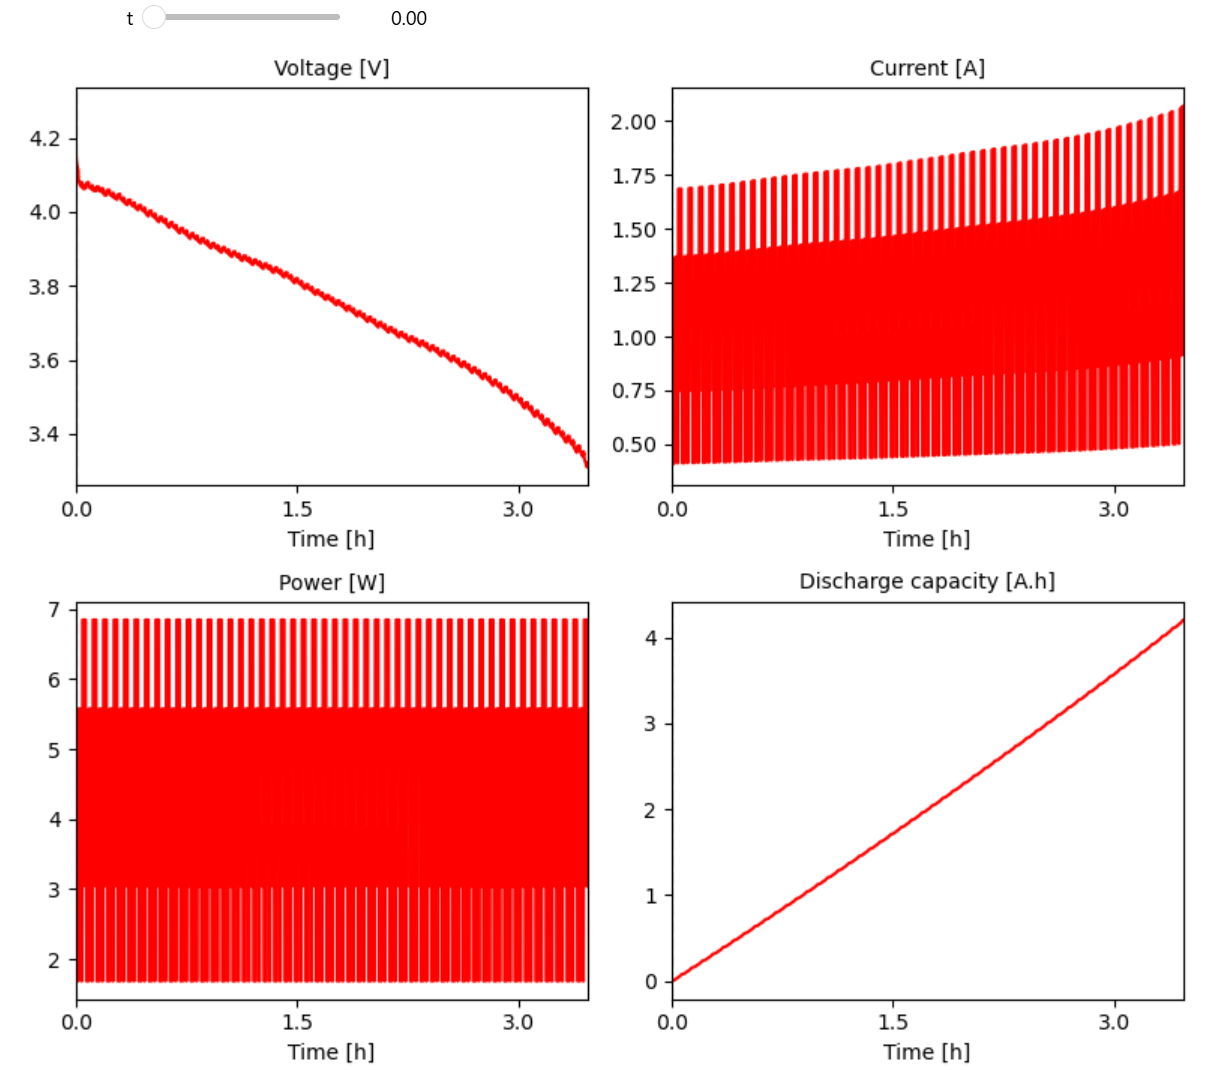

In [38]:
I = sol["Current [A]"].entries
t = sol["Time [s]"].entries

idx_max_I = np.argmax(I)

t_max_I = float(t[idx_max_I])

print(t_max_I)

output_variables = ["Negative particle surface concentration [mol.m-3]",
             "Positive particle surface concentration [mol.m-3]",
             "Electrolyte concentration [mol.m-3]", 
             "Negative electrode potential [V]",
             "Positive electrode potential [V]",
             "Electrolyte potential [V]"
             ]

sim.plot(output_variables)

12480.0


interactive(children=(FloatSlider(value=0.0, description='t', max=3.5, step=0.035), Output()), _dom_classes=('…

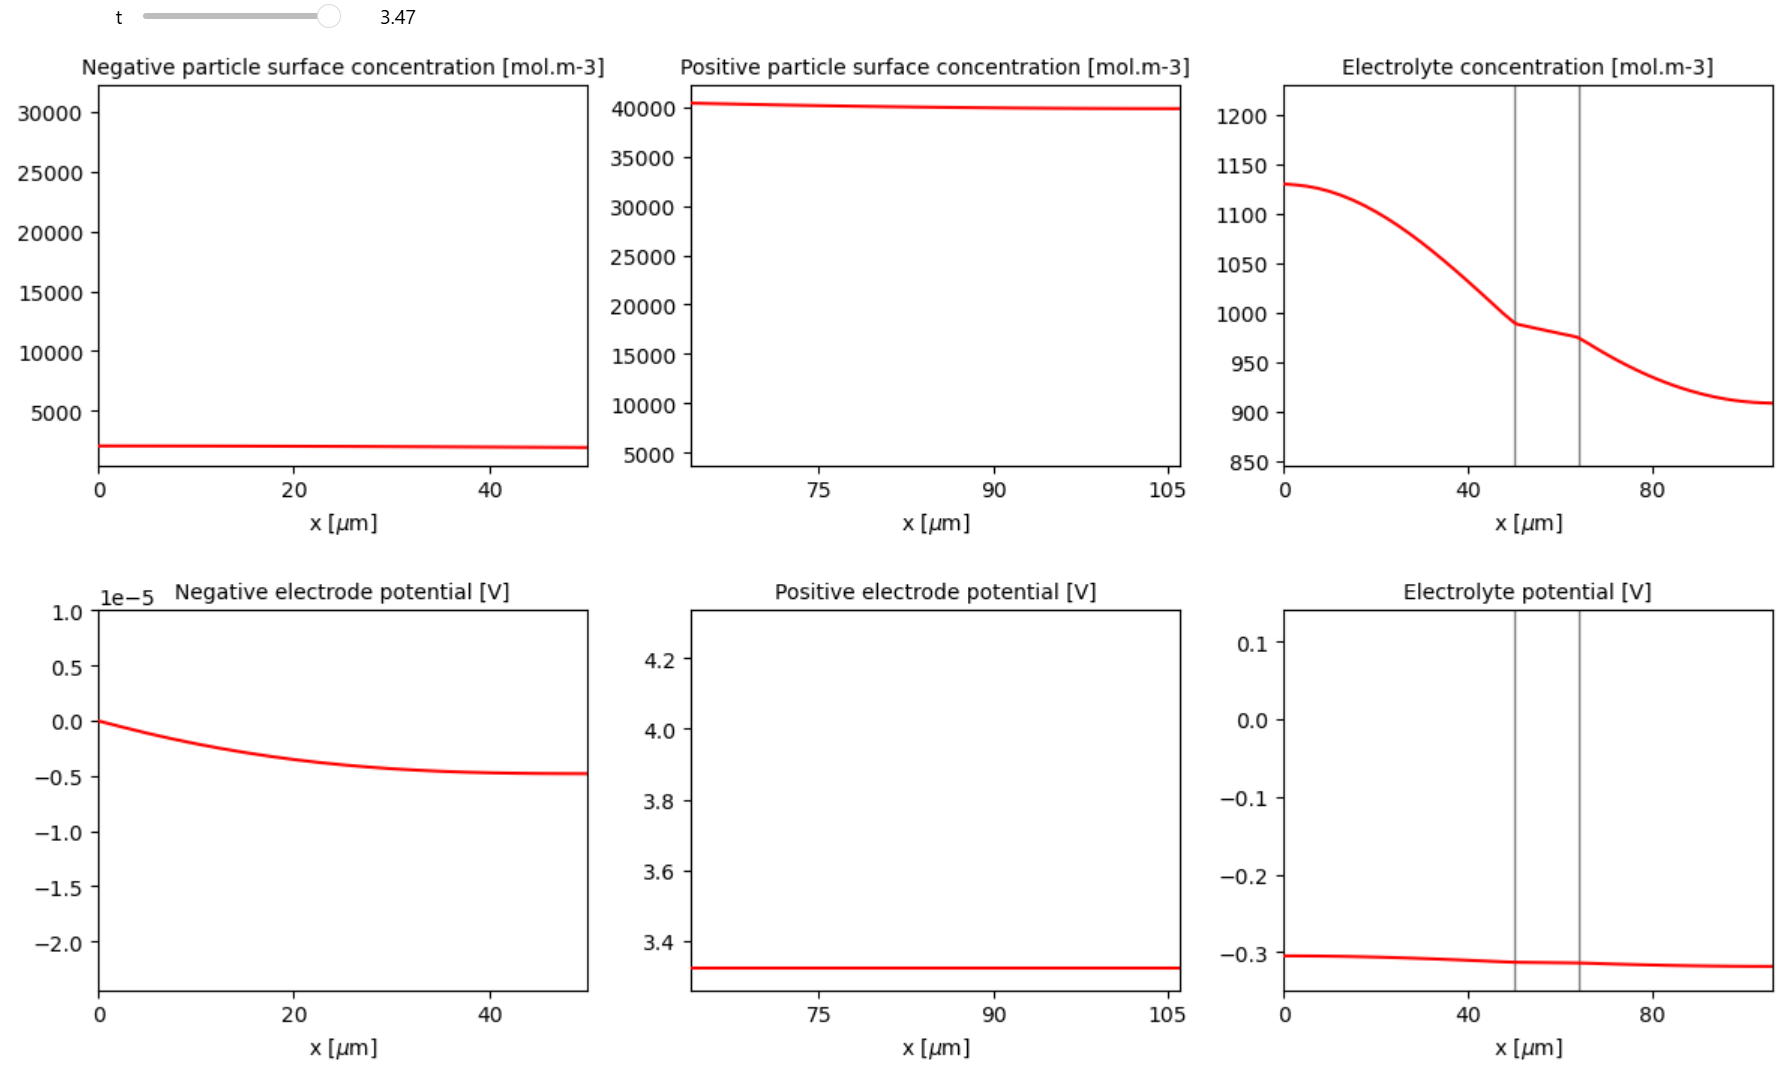

In [39]:
print("Number of cells:", npns_fig)
print("Max Power of Cell (when it's needed at the relevant SOC):", P_cell_fig, "W")

Number of cells: 148
Max Power of Cell (when it's needed at the relevant SOC): 7.732824427480916 W


##### Skydio

In [40]:
npns_sky = 8

power_interpolant = pybamm.Interpolant(t_sky, P_sky/npns_sky, pybamm.t)

model = pybamm.lithium_ion.DFN(options={"operating mode": "power"})

params = get_parameter_values()
params.update({"Power function [W]": power_interpolant}, check_already_exists=False)

solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, solver=solver)
sol = sim.solve(t_eval=[0, t_sky[-1]], initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=1630.0, step=16.3), Output()), _dom_classes=…

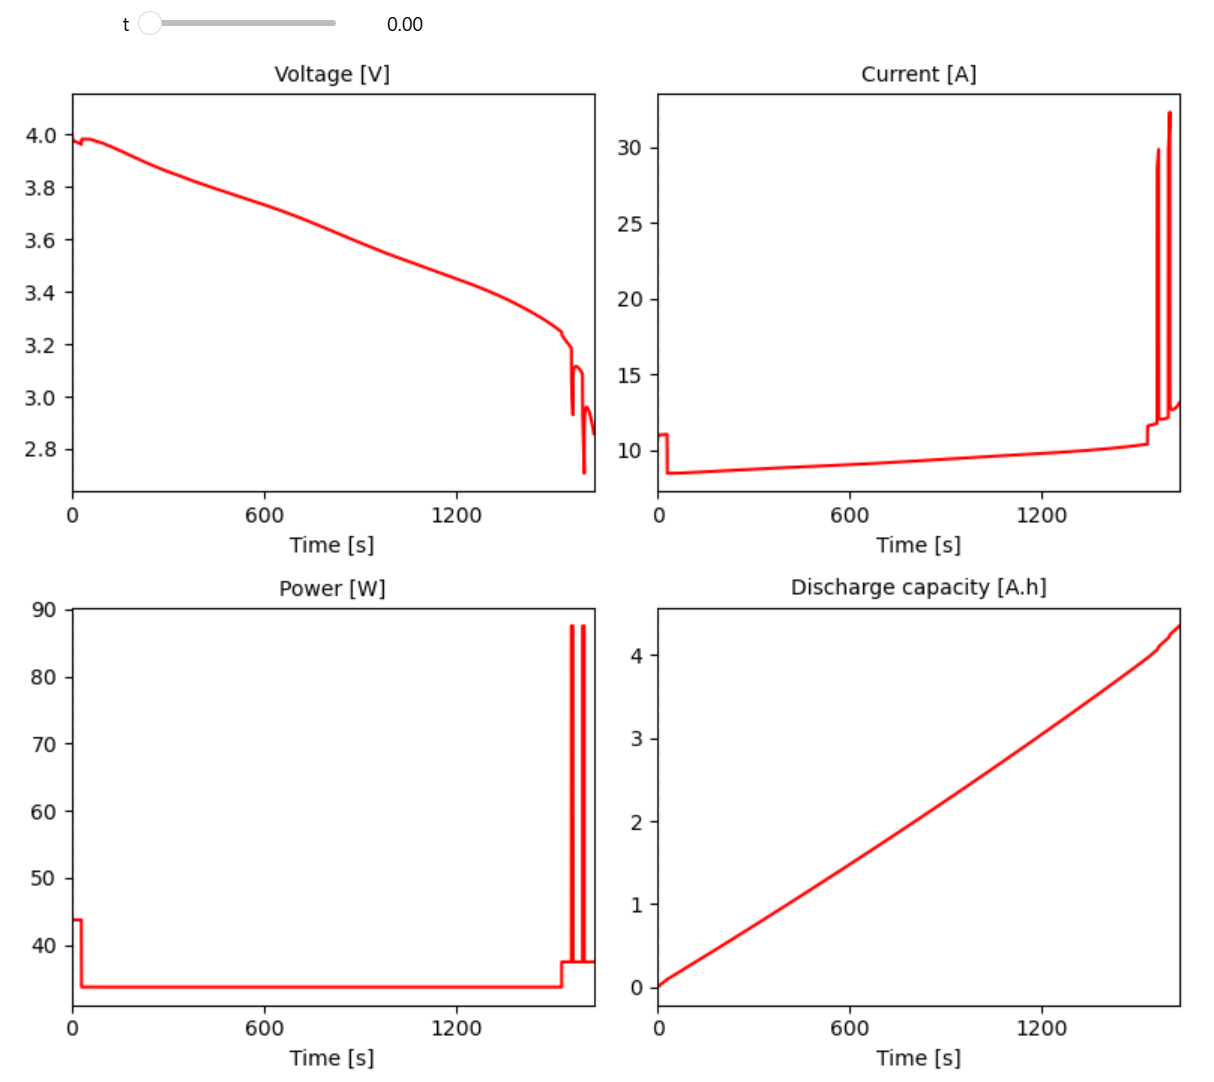

In [41]:
I = sol["Current [A]"].entries
t = sol["Time [s]"].entries

idx_max_I = np.argmax(I)

t_max_I = float(t[idx_max_I])

print(t_max_I)

output_variables = ["Negative particle surface concentration [mol.m-3]",
             "Positive particle surface concentration [mol.m-3]",
             "Electrolyte concentration [mol.m-3]", 
             "Negative electrode potential [V]",
             "Positive electrode potential [V]",
             "Electrolyte potential [V]"
             ]

sim.plot(output_variables)

1599.999862677028


interactive(children=(FloatSlider(value=0.0, description='t', max=1630.0, step=16.3), Output()), _dom_classes=…

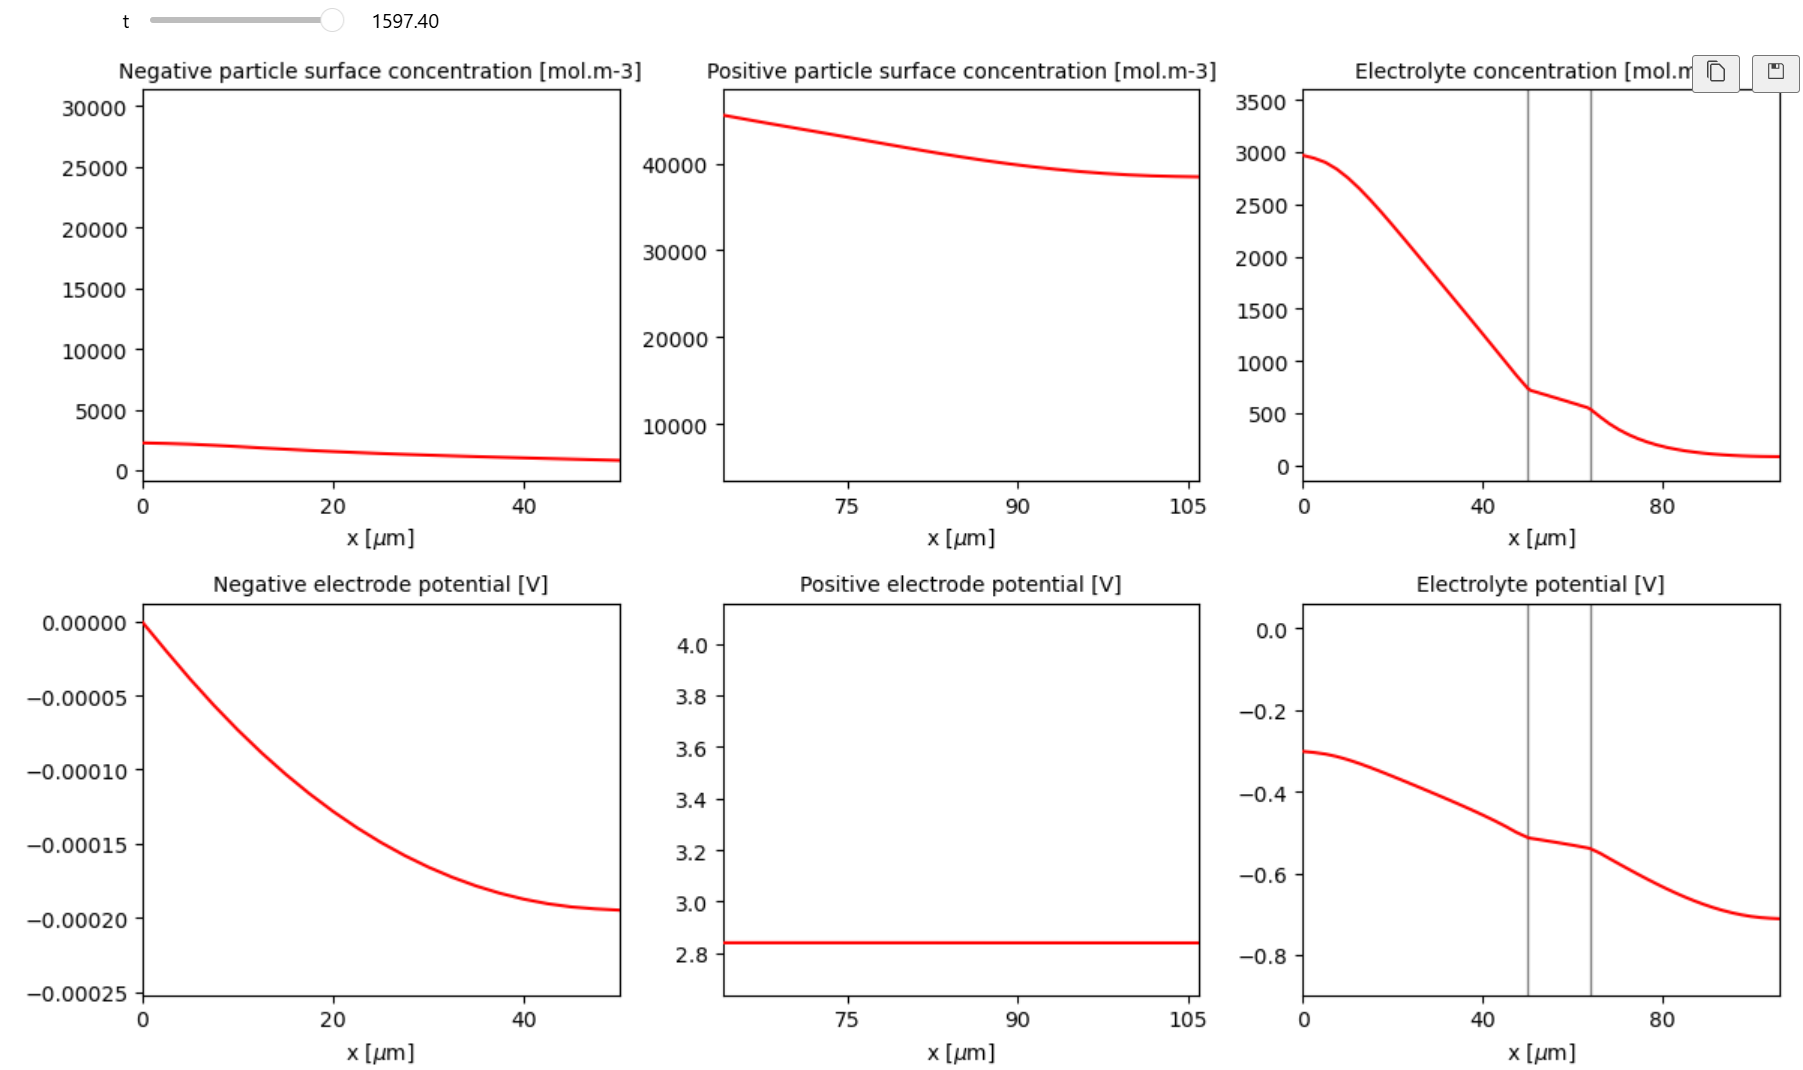

In [42]:
print("Number of cells:", npns_sky)
P_cell_sky = P_max_sky/npns_sky
print("Max Power of Cell (when it's needed at the relevant SOC):", P_cell_sky, "W")

Number of cells: 8
Max Power of Cell (when it's needed at the relevant SOC): 87.5 W


##### Pelican

In [43]:


npns_pel = 855

power_interpolant = pybamm.Interpolant(t_pel, 1000*P_pel/npns_pel, pybamm.t)

model = pybamm.lithium_ion.DFN(options={"operating mode": "power"})

params = get_parameter_values()
params.update({"Power function [W]": power_interpolant}, check_already_exists=False)

solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, solver=solver)
sol = sim.solve(t_eval=[0, t_pel[-1]], initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=2049.822870773552, step=20.49822870773552), …

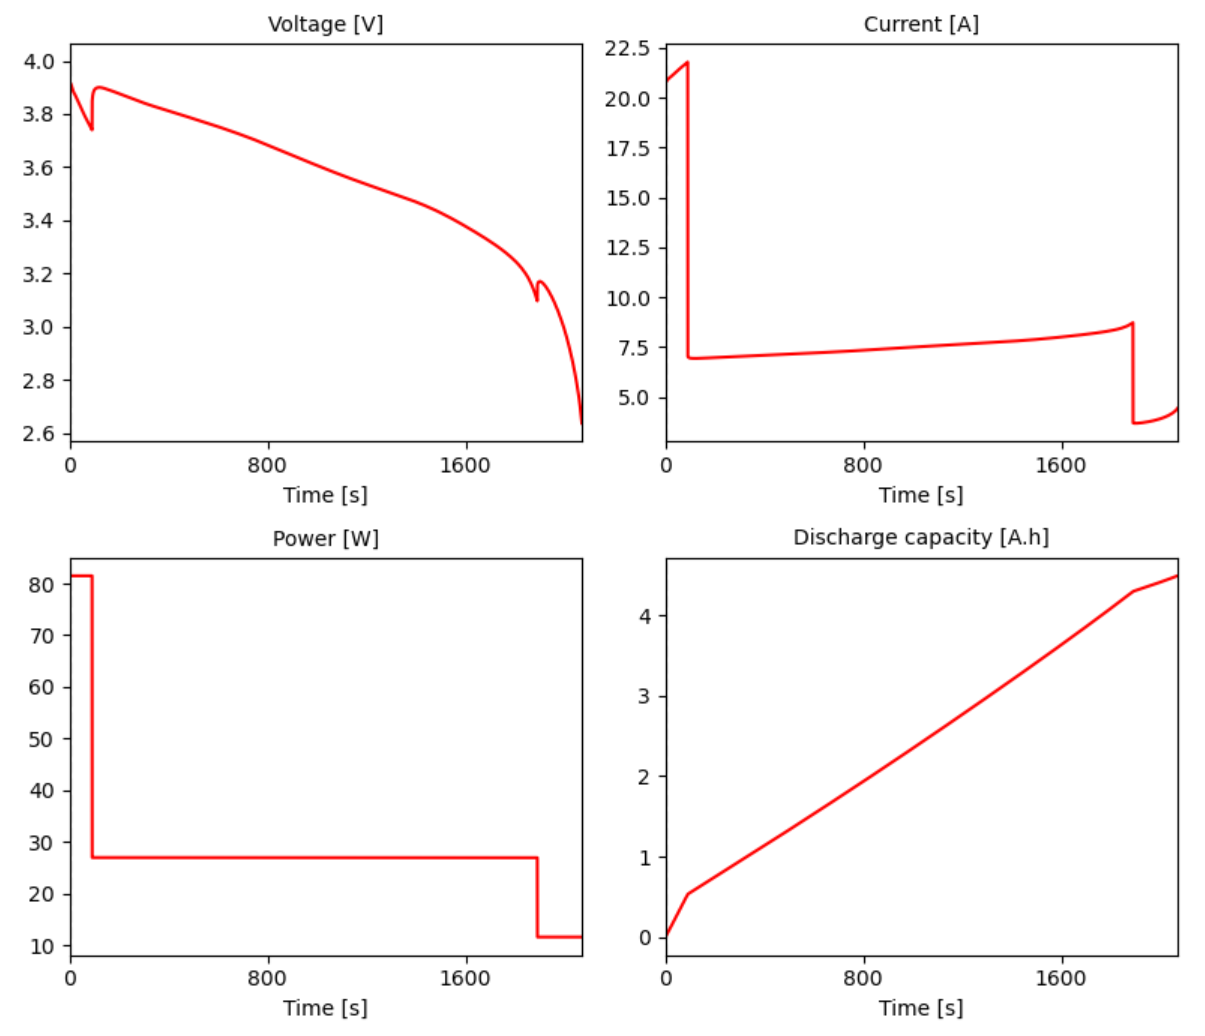

In [44]:
I = sol["Current [A]"].entries
t = sol["Time [s]"].entries

idx_max_I = np.argmax(I)

t_max_I = float(t[idx_max_I])

print(t_max_I)

output_variables = ["Negative particle surface concentration [mol.m-3]",
             "Positive particle surface concentration [mol.m-3]",
             "Electrolyte concentration [mol.m-3]", 
             "Negative electrode potential [V]",
             "Positive electrode potential [V]",
             "Electrolyte potential [V]"
             ]

sim.plot(output_variables)

89.99999678830633


interactive(children=(FloatSlider(value=0.0, description='t', max=2049.822870773552, step=20.49822870773552), …

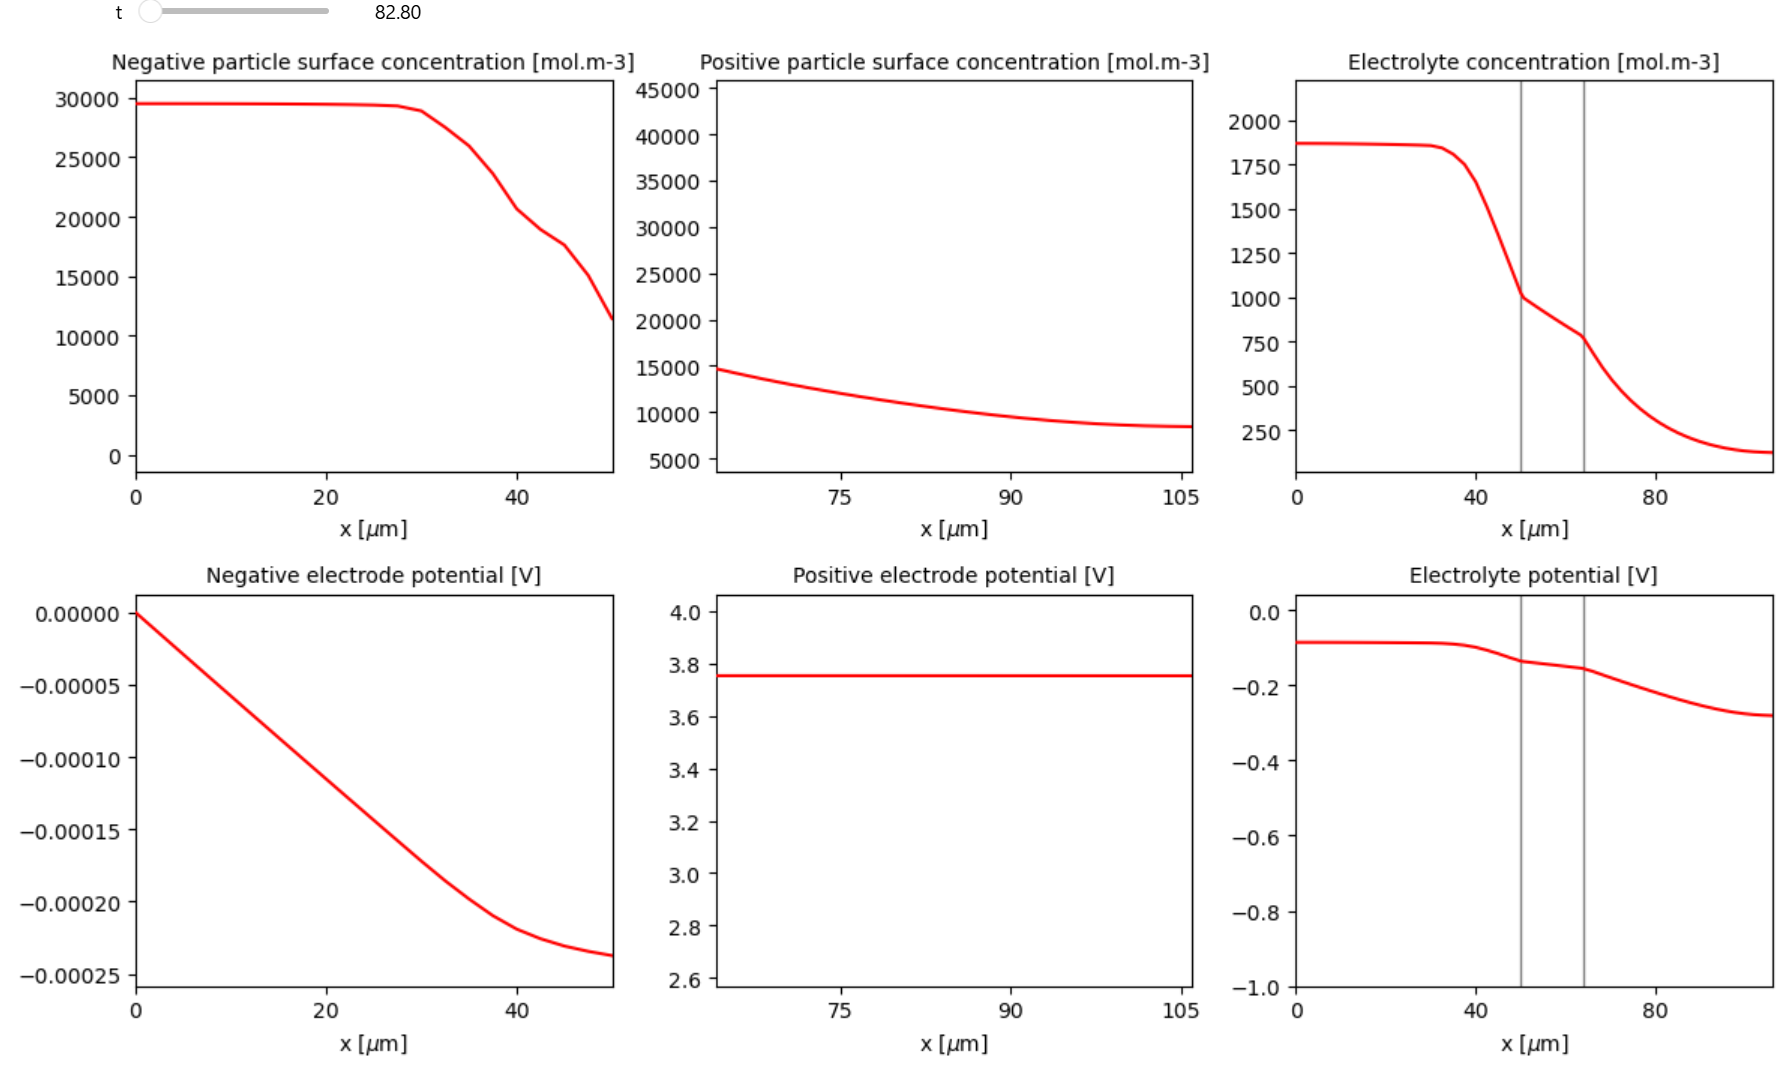

In [45]:
print("Number of cells:", npns_pel)
P_cell_pel = P_max_pel/npns_pel
print("Max Power of Cell (when it's needed at the relevant SOC):", P_cell_pel, "W")

Number of cells: 855
Max Power of Cell (when it's needed at the relevant SOC): 81.87134502923976 W


### 9.

#### LGM50

#### Figure

In [46]:
import pybamm
import numpy as np
from params_lgm50 import get_parameter_values

# Original Parameters ------------------------------------------------------------
params.update({"Negative electrode diffusivity [m2.s-1]": 3.3e-14,
               "Positive electrode diffusivity [m2.s-1]": 4e-15,

               "Maximum concentration in negative electrode [mol.m-3]": 33133.0,
               "Maximum concentration in positive electrode [mol.m-3]": 63104.0,

               "Negative electrode thickness [m]": 8.52e-05,
               "Positive electrode thickness [m]": 7.56e-05,

               "Negative particle radius [m]": 5.86e-06,
               "Positive particle radius [m]": 5.22e-06,

               "Negative electrode porosity": 0.25,
               "Negative electrode active material volume fraction": 0.75,

               "Positive electrode porosity": 0.335,
               "Positive electrode active material volume fraction": 0.665,

               }, check_already_exists=False)

#131 cells as required by energy 

npns_fig = 99

model = pybamm.lithium_ion.DFN()

params = get_parameter_values()
params.update({"Negative electrode diffusivity [m2.s-1]": 3.3e-14,
               "Positive electrode diffusivity [m2.s-1]": 4e-15,

               "Maximum concentration in negative electrode [mol.m-3]": 33133.0,
               "Maximum concentration in positive electrode [mol.m-3]": 63104.0,

               "Negative electrode thickness [m]": 10e-05,
               "Positive electrode thickness [m]": 9e-05,
                #Increase electrode thickness
               "Negative particle radius [m]": 1e-06,
               "Positive particle radius [m]": 1e-06,
                #Decrease particle radius 
               "Negative electrode porosity": 0.20,
               "Negative electrode active material volume fraction": 0.80,

               "Positive electrode porosity": 0.3,
               "Positive electrode active material volume fraction": 0.70,
                #Increase active material volume fraction, decrease porosity 

               }, check_already_exists=False)


experiment = pybamm.Experiment(
    [
        f"Discharge at {250/npns_fig} W for 60 seconds",
        f"Discharge at {825/npns_fig} W for 75 seconds",
        f"Discharge at {250/npns_fig} W for 15 seconds",
        f"Discharge at {577/npns_fig} W for 5 seconds",
        f"Discharge at {450/npns_fig} W for 10 seconds",
        f"Discharge at {1013/npns_fig} W for 75 seconds",
        f"Discharge at {450/npns_fig} W for 15 seconds",
    ] *49
     +
    [
        f"Discharge at {250/npns_fig} W for 60 seconds",
        f"Discharge at {825/npns_fig} W for 45 seconds",
    ], termination="2.5 V")


solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)
dchg_cap = npns_fig*sol["Discharge capacity [A.h]"].entries[-1]*V_nom_LGM50

print("Discharge Capacity:", dchg_cap, "Wh")
print("Discharge Capacity Required:", E_fig, "Wh")

print("Sim Time:", sol["Time [h]"].entries[-1], "hours")

interactive(children=(FloatSlider(value=0.0, description='t', max=3.5, step=0.035), Output()), _dom_classes=('…

Discharge Capacity: 2312.876192104508 Wh
Discharge Capacity Required: 2371.2708333333335 Wh
Sim Time: 3.5 hours


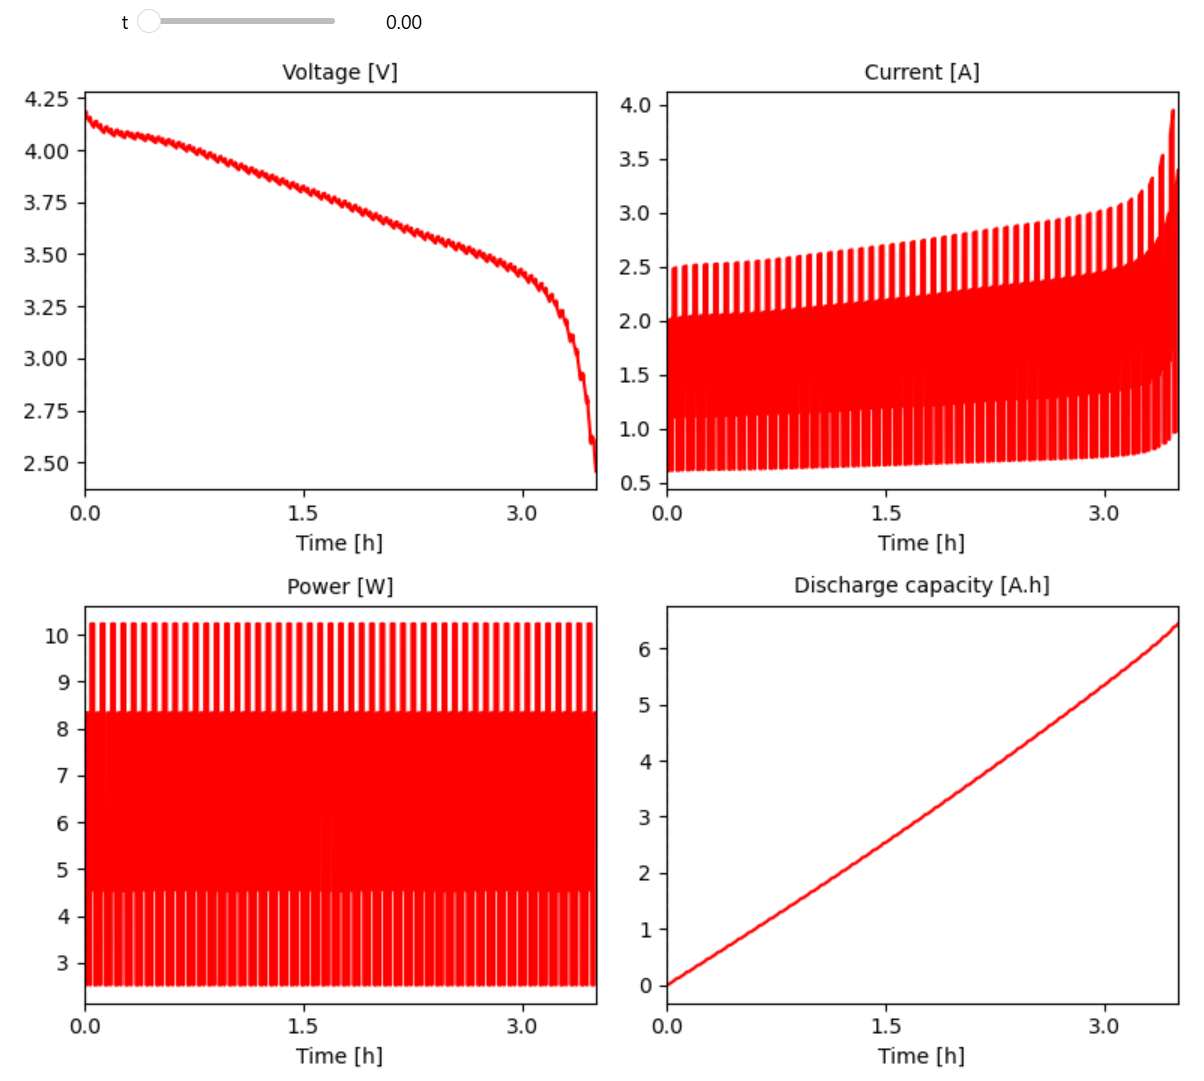

###### By increasing electrode thickness, decreasing particle radii, and decreasing porosity (increasing active material fraction), I was able to reduce the cells for the mission from 131 to 99 for the LGM50 case.

##### Skydio

In [47]:
import pybamm
import numpy as np
from params_lgm50 import get_parameter_values

# Original Parameters ------------------------------------------------------------
params = get_parameter_values()
params.update({"Negative electrode diffusivity [m2.s-1]": 3.3e-14,
               "Positive electrode diffusivity [m2.s-1]": 4e-15,

               "Maximum concentration in negative electrode [mol.m-3]": 33133.0,
               "Maximum concentration in positive electrode [mol.m-3]": 63104.0,

               "Negative electrode thickness [m]": 8.52e-05,
               "Positive electrode thickness [m]": 7.56e-05,

               "Negative particle radius [m]": 5.86e-06,
               "Positive particle radius [m]": 5.22e-06,

               "Negative electrode porosity": 0.25,
               "Negative electrode active material volume fraction": 0.75,

               "Positive electrode porosity": 0.335,
               "Positive electrode active material volume fraction": 0.665,

               }, check_already_exists=False)



P_sky = np.array([350, 350, 270,   270,  300,     300,  700,     700,  300,     300,  700,     700,   300,     300 ])
t_sky = np.array([0.0, 30,  30.01, 1530, 1530.01, 1560, 1560.01, 1565, 1565.01, 1595, 1595.01, 1600,  1600.01, 1630])

npns_sky = 9

power_interpolant = pybamm.Interpolant(t_sky, P_sky/npns_sky, pybamm.t)

model = pybamm.lithium_ion.DFN(options={"operating mode": "power"})

params = get_parameter_values()
params.update({"Power function [W]": power_interpolant}, check_already_exists=False)

params.update({"Negative electrode diffusivity [m2.s-1]": 9e-14,
               "Positive electrode diffusivity [m2.s-1]": 9e-15,
                #Increase electrode diffusivty 
               "Maximum concentration in negative electrode [mol.m-3]": 33133.0,
               "Maximum concentration in positive electrode [mol.m-3]": 63104.0,

               }, check_already_exists=False)

solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, solver=solver)
sol = sim.solve(t_eval=[0, t_sky[-1]], initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)

print("Sim Time:", sol["Time [s]"].entries[-1], "sec")

interactive(children=(FloatSlider(value=0.0, description='t', max=1630.0, step=16.3), Output()), _dom_classes=…

Sim Time: 1630.0 sec


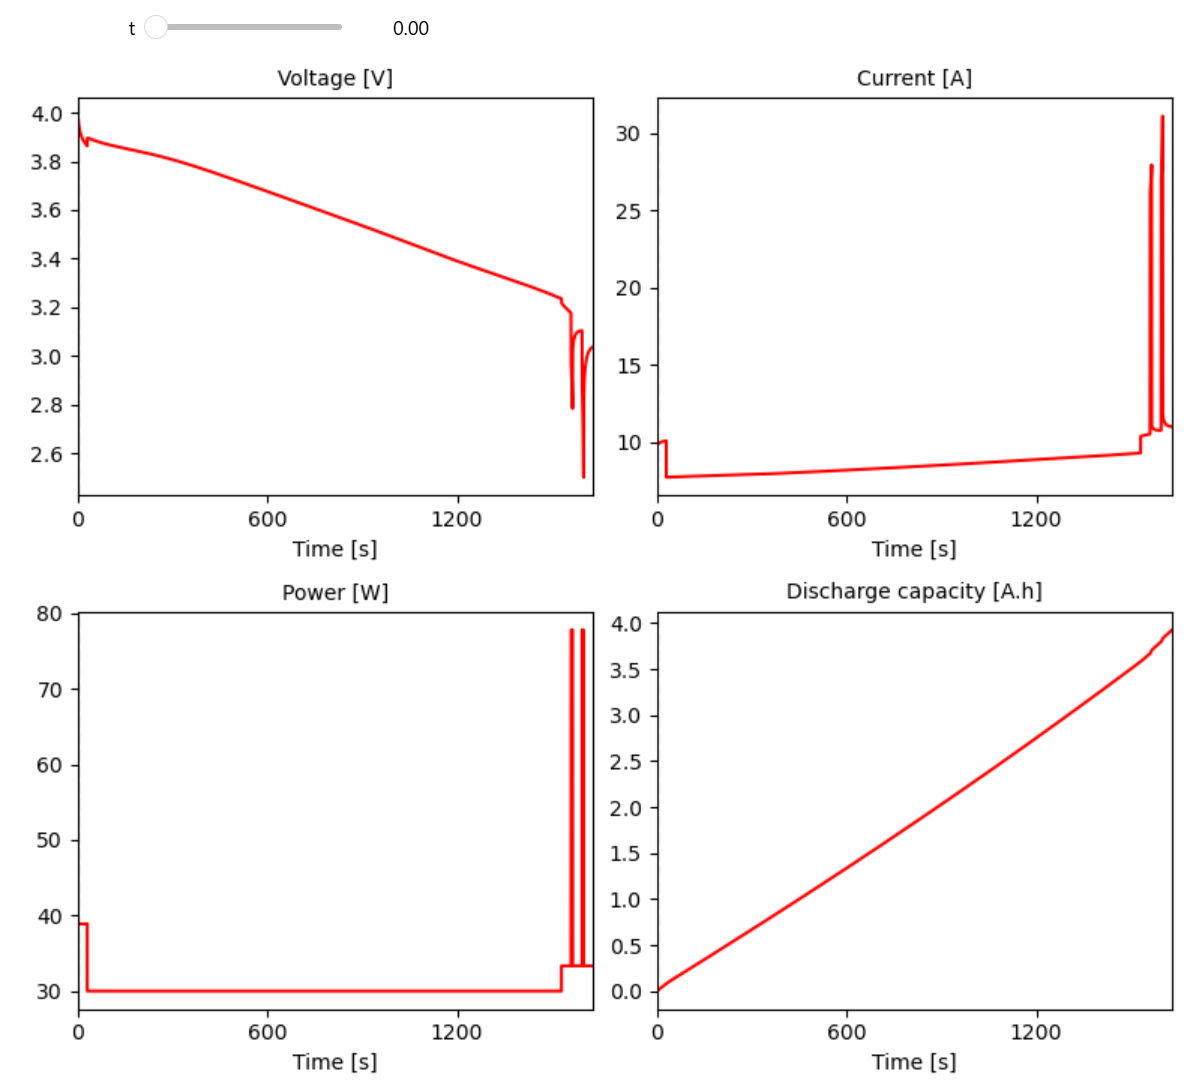

###### By increasing electrode diffusivity, I was able to reduce the cells for the mission from 10 to 9 for the LGM50 case.

##### Pelican

In [48]:
import pybamm
import numpy as np
from params_lgm50_copy import get_parameter_values

# Original Parameters ------------------------------------------------------------
params = get_parameter_values()
params.update({"Negative electrode diffusivity [m2.s-1]": 3.3e-14,
               "Positive electrode diffusivity [m2.s-1]": 4e-15,

               "Maximum concentration in negative electrode [mol.m-3]": 33133.0,
               "Maximum concentration in positive electrode [mol.m-3]": 63104.0,

               "Negative electrode thickness [m]": 8.52e-05,
               "Positive electrode thickness [m]": 7.56e-05,

               "Negative particle radius [m]": 5.86e-06,
               "Positive particle radius [m]": 5.22e-06,

               "Negative electrode porosity": 0.25,
               "Negative electrode active material volume fraction": 0.75,

               "Positive electrode porosity": 0.335,
               "Positive electrode active material volume fraction": 0.665,

               }, check_already_exists=False)

P_pel = np.array([70,  70,  23.2,  23.2, 10,      10  ])
t_pel = np.array([0.0, 90,  90.01, 1890, 1890.01, 2070])

npns_pel = 915

power_interpolant = pybamm.Interpolant(t_pel, 1000*P_pel/npns_pel, pybamm.t)

model = pybamm.lithium_ion.DFN(options={"operating mode": "power"})

params = get_parameter_values()
params.update({"Power function [W]": power_interpolant}, check_already_exists=False)

params.update({"Negative electrode diffusivity [m2.s-1]": 9e-14,
               "Positive electrode diffusivity [m2.s-1]": 9e-15,
                #Increase electrode diffusivty 
               "Maximum concentration in negative electrode [mol.m-3]": 33133.0,
               "Maximum concentration in positive electrode [mol.m-3]": 63104.0,

               }, check_already_exists=False)

solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, solver=solver)
sol = sim.solve(t_eval=[0, t_pel[-1]], initial_soc=1.0)



output_variables = ["Voltage [V]", "Current [A]", "Power [W]", "Discharge capacity [A.h]"]
sim.plot(output_variables)

print("Sim Time:", sol["Time [s]"].entries[-1], "sec")

interactive(children=(FloatSlider(value=0.0, description='t', max=2070.0, step=20.7), Output()), _dom_classes=…

Sim Time: 2070.0 sec


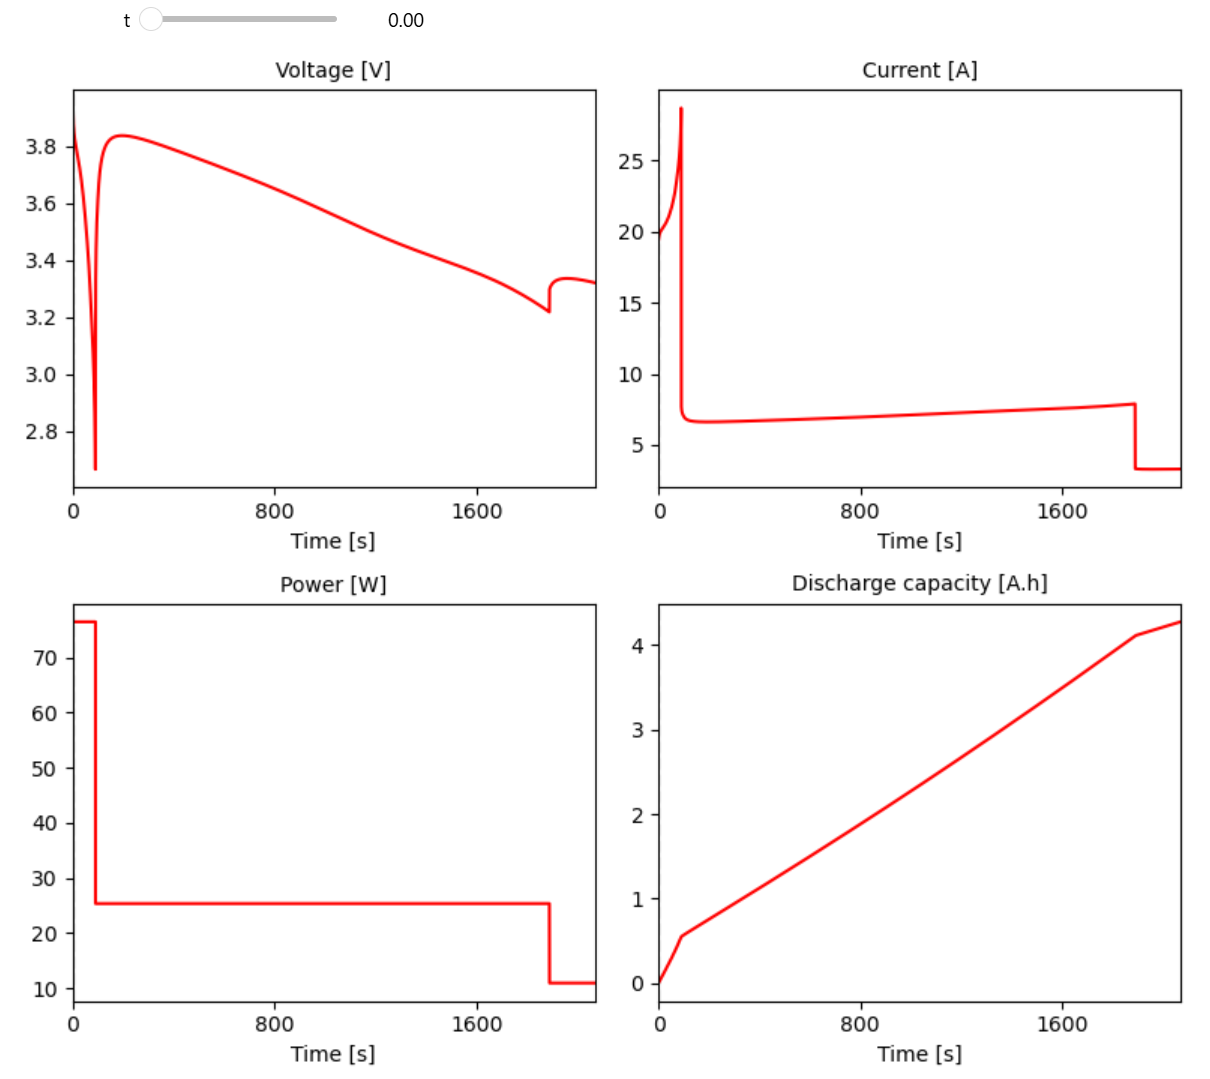

###### By increasing electrode diffusivity and increasing m_ref in the exchange current density equations, I was able to reduce the cells for the mission from 994 to 915 for the LGM50 case.

###### For P45B, the tuning of parameters is the same. Increase electrode thickness, decreasing particle radii and porosity for energy limited case (Figure and Pelican), increase electrode diffusivity for power limited case (Skydio)

### 10. CCCV Charging

#### LGM50

interactive(children=(FloatSlider(value=0.0, description='t', max=3.2134158939127877, step=0.03213415893912787…

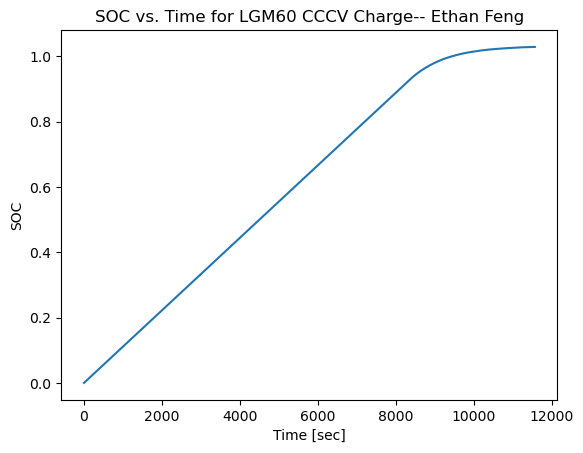

Time when 99% SOC is reached: 9185.626322050168 sec


In [49]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
from params_lgm50 import get_parameter_values


model = pybamm.lithium_ion.DFN()
params = get_parameter_values()

experiment = pybamm.Experiment(
    [
        "Charge at 0.4C until 4.2 V",
        "Hold at 4.2 V until 50 mA",
    ])

solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=0)

output_variables = ["Voltage [V]", "Current [A]"]
sim.plot(output_variables)

# Below is plotting with matplotlib ---------------------------------------------------------------

t_cccv = sol["Time [s]"].entries
soc_cccv = (sol["Discharge capacity [A.h]"].entries)/-5

plt.plot(t_cccv, soc_cccv)
plt.xlabel("Time [sec]")
plt.ylabel("SOC")
plt.title("SOC vs. Time for LGM60 CCCV Charge-- Ethan Feng")
plt.show()

idx_99 = np.where(soc_cccv >= 0.99)[0][0]
t_99soc = t_cccv[idx_99]

print("Time when 99% SOC is reached:", t_99soc, "sec")

# -------------------------------------------------------------------------------------------------


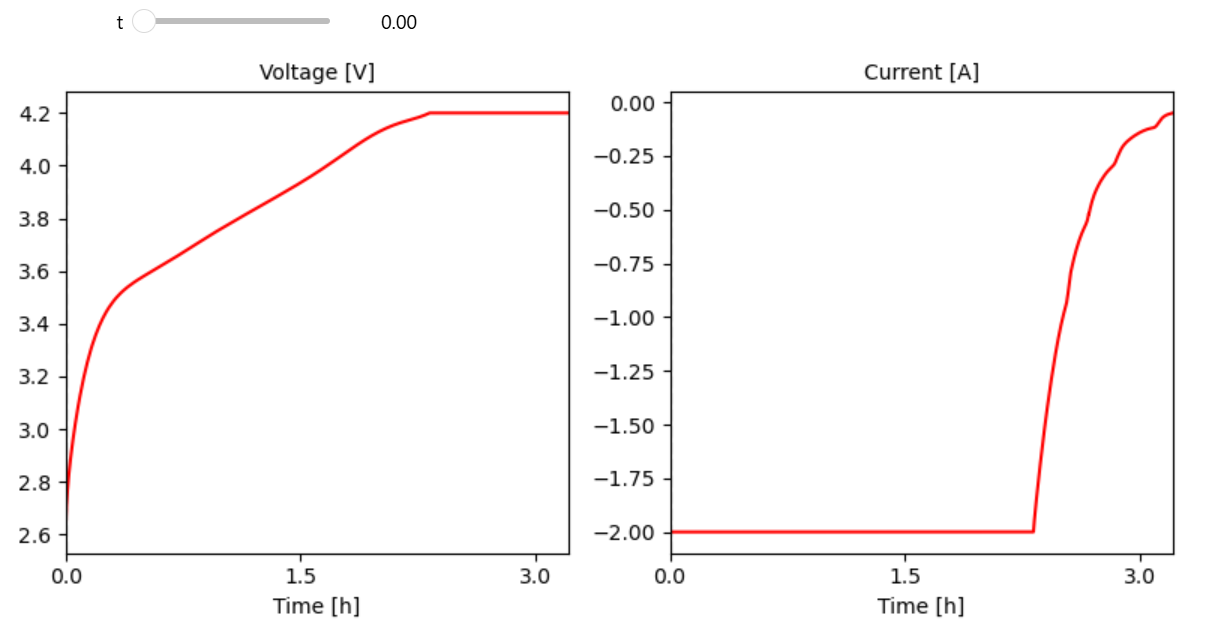

#### P45B

interactive(children=(FloatSlider(value=0.0, description='t', max=1.1854460812410585, step=0.01185446081241058…

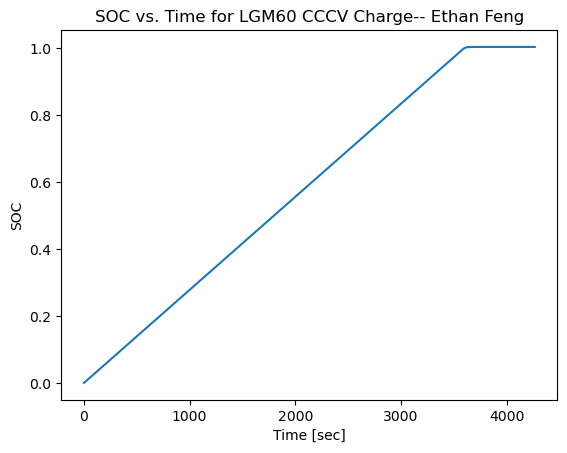

Time when 99% SOC is reached: 3565.205406754939 sec


In [50]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
from params_p45b import get_parameter_values


model = pybamm.lithium_ion.DFN()
params = get_parameter_values()

experiment = pybamm.Experiment(
    [
        "Charge at 4.5 A until 4.2 V",
        "Hold at 4.2 V until 0.01 mA",
    ])

solver = pybamm.IDAKLUSolver()

sim = pybamm.Simulation(model=model, parameter_values=params, experiment=experiment, solver=solver)
sol = sim.solve(initial_soc=0)

output_variables = ["Voltage [V]", "Current [A]"]
sim.plot(output_variables)

# Below is plotting with matplotlib ---------------------------------------------------------------

t_cccv = sol["Time [s]"].entries
soc_cccv = (sol["Discharge capacity [A.h]"].entries)/-4.5

plt.plot(t_cccv, soc_cccv)
plt.xlabel("Time [sec]")
plt.ylabel("SOC")
plt.title("SOC vs. Time for LGM60 CCCV Charge-- Ethan Feng")
plt.show()

idx_99 = np.where(soc_cccv >= 0.99)[0][0]
t_99soc = t_cccv[idx_99]

print("Time when 99% SOC is reached:", t_99soc, "sec")

# -------------------------------------------------------------------------------------------------


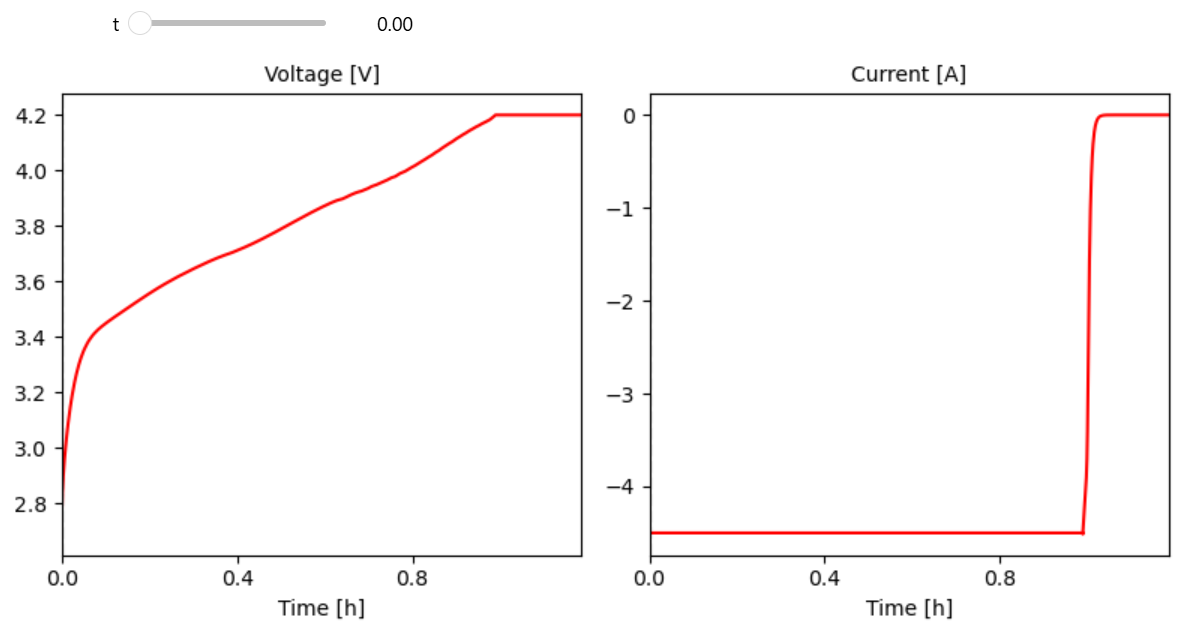